<a href="https://colab.research.google.com/github/wellooriginal/mvp-analise_vendas/blob/main/An%C3%A1lise_de_Dados_e_Boas_Pr%C3%A1ticas_Wellington_Sales_Chaves_(40530010055_20250_01).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Análise de Dados e Boas Práticas

**Nome:** Wellington Sales Chaves

**Matrícula:** 2025000

**Dataset:** [Vendas](https://www.kaggle.com/datasets/dienert/vendas)

# Descrição do Problema

O conjunto de dados Vendas é um conjunto de dados transacional que contém registros de vendas realizadas por uma empresa. Ele inclui informações detalhadas sobre cada transação, como a data da venda, o nome do produto, a categoria do serviço, a quantidade vendida, o preço unitário, a receita gerada. O objetivo principal desse conjunto de dados é permitir análises de desempenho financeiro e comercial, como identificar os produtos mais lucrativos, avaliar a receita por período e acompanhar a evolução do lucro ao longo do tempo.

## Hipóteses do Problema

- ***Produtos com maior preço unitário resultam em maior receita total?***

- ***Existe uma correlação entre a quantidade vendida e o valor total da venda?***

- ***Determinados produtos geram lucro de forma mais consistente ao longo do tempo?***

- ***As vendas aumentam em determinadas épocas do ano?***

- ***Vendedores específicos geram mais lucro do que outros?***

- ***Existem padrões nas vendas de acordo com a data?***

## Tipo de Problema

Este é um problema de **classificação não supervisionado**. Se trata de uma análise descritiva e exploratória de vendas. O conjunto de dados contém informações sobre vendas de produtos realizadas por diferentes vendedores ao longo do tempo.

Dado um conjunto de variáveis, como: produto, vendedor, preço unitário, receita, quantidade e data. É possível identificar padrões, tendências e outliers nas vendas.

## Seleção de Dados

O dataset Vendas foi obtido a partir da plataforma Kaggle, mais especificamente do conjunto de dados disponível em Relatórios de Vendas.

https://www.kaggle.com/datasets/dienert/vendas

## Atributos do Dataset

O dataset Vendas contém 44.500 amostras. Possui dez atributos:

* **name** – Nome do cliente ou vendedor responsável pela transação.

* **sale_id** – Identificador único da venda, podendo agrupar múltiplos produtos em uma mesma transação.

* **product_id** – Código identificador único do produto vendido.

* **product** – Nome do produto vendido.

* **price_y** – Preço unitário do produto.

* **price_x** – Custo do produto.

* **quantity** – Quantidade de unidades vendidas do produto.

* **price_x** – Valor Unitário do produto.

* **created_at** – Data e hora em que a venda foi registrada no sistema.

* **updated_at** – Data e hora da última atualização no registro da venda.

* **email** – Endereço de e-mail associado à venda.

* **email** – Valor total da venda do produto (preço unitário × quantidade, mas pode ter descontos ou ajustes).

# Importação das Bibliotecas Necessárias e Carga de Dados

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados, bem como o carregamento inicial do dataset Iris.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
# Carregando o Arquivo
Vendas = '/content/Vendas.csv'

# Lendo o Arquivo
df = pd.read_csv(Vendas)

In [6]:
# Garantindo que a coluna está em formato datetime
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", message="Parsing dates in .* format when dayfirst=True was specified")
    df['created_at'] = pd.to_datetime(df['created_at'], dayfirst=True)

In [8]:
# Convertendo a coluna de data
df['created_at'] = pd.to_datetime(df['created_at'], format='%d/%m/%Y')
# Criar colunas com as décadas
df['decada'] = (df['created_at'].dt.year // 10) * 10

In [9]:
# Coluna de mês
df['mes'] = df['created_at'].dt.month

In [11]:
# Coluna com o ano e mês
with warnings.catch_warnings():
    warnings.simplefilter("ignore", UserWarning)
    df['ano_mes'] = df['created_at'].dt.to_period('M').dt.to_timestamp()

In [12]:
#Coluna com o dia da Semana
df['dia_semana'] = df['created_at'].dt.dayofweek

In [13]:
# Renomeando as Colunas

df = df.rename(columns={
    'price_y': 'preco_unitario',
    'price_x': 'custo',
    'quantity': 'quantidade',
    'name': 'vendedor',
    'product':'produtos',
    'created_at': 'data_venda',
    'updated_at': 'data_atualizacao'
})

In [14]:
# Calcular receita com quantidade * preço de venda (price_y)
df['receita'] = df['quantidade'] * df['preco_unitario']

In [15]:
# Calcular lucro com receita - custo
df['lucro'] = df['receita'] - df['custo']

In [16]:
# Removendo o horário e formatando para o padrão brasileiro (dd/mm/aaaa)
df['data_venda'] = df['data_venda'].dt.strftime('%d/%m/%Y')

In [17]:
# guardo o dataset em um dataframe
df_modelo = df[['quantidade', 'receita','preco_unitario','custo','decada']].copy()
df_modelo['vendedor'] = df['vendedor']


In [18]:
# primeiras linhas
df.head()

,vendedor,sale_id,product_id,produtos,preco_unitario,quantidade,custo,data_venda,data_atualizacao,email,decada,mes,ano_mes,dia_semana,receita,lucro
0,Mason Howell,442bc2f0-22d3-3c8a-9f71-0f9c16cee0b2,296,Lang Club,866.694,3.89990,2433.800,17/09/1997,2007-02-15 19:34:06+00:00,jessica.cole@example.net,1990,9,1997-09-01,2,3380.019931,946.219931
1,Mason Howell,442bc2f0-22d3-3c8a-9f71-0f9c16cee0b2,296,Lang Club,866.694,4.00000,1196.580,17/09/1997,2007-02-15 19:34:06+00:00,jessica.cole@example.net,1990,9,1997-09-01,2,3466.776000,2270.196000
2,Mason Howell,442bc2f0-22d3-3c8a-9f71-0f9c16cee0b2,296,Lang Club,866.694,1.38452,1975.000,17/09/1997,2007-02-15 19:34:06+00:00,jessica.cole@example.net,1990,9,1997-09-01,2,1199.955177,-775.044823
3,Mason Howell,442bc2f0-22d3-3c8a-9f71-0f9c16cee0b2,296,Lang Club,866.694,2.22500,119.526,17/09/1997,2007-02-15 19:34:06+00:00,jessica.cole@example.net,1990,9,1997-09-01,2,1928.394150,1808.868150
4,Mason Howell,442bc2f0-22d3-3c8a-9f71-0f9c16cee0b2,296,Lang Club,866.694,2.89000,2386.940,17/09/1997,2007-02-15 19:34:06+00:00,jessica.cole@example.net,1990,9,1997-09-01,2,2504.745660,117.805660


**Comentários**

* Nas primeiras 5 linhas, todos os vendedores têm o mesmo nome, sugerindo que os dados podem estar agrupados por algum critério não explícito como equipe.

* As datas de venda variam bastante, cobrindo um período amplo — de 02/01/1970 até 04/02/2020.

* Os dados não estão ordenados cronologicamente pela data da venda.

* Os sprodutos possuem quantidades e preços unitários bastante variados, o que pode indicar diferentes tipos de produtos com margens e perfis distintos.

* A presença de e-mails.

* Foi necessário renomear (traduzir) as colunas que serão usadas.

* Foi necessário garantir que a coluna de data estava em formato datetime.

* Foi necessário retirar o horário, já que este dado é irrelvante por ser ficiticio.

* Foi necessário colocar a data e o produto em formato brasileiro.

* Coluna Decada adicionada ao dataset.

* Foi necessário adicionar a coluna de receita.

* Foi necessário adicionar a coluna de custo total.

* Coluna Ano_Mes.

* Coluna Mês.

* Coluna Semana.

# Análise de Dados

Nesta etapa de Análise de Dados Exploratória (EDA) sobre o dataset ***Vendas***, buscamos compreender a estrutura, distribuição e comportamento das variáveis envolvidas nas transações comerciais. Essa análise é essencial para identificar padrões, possíveis inconsistências, outliers, além de fornecer insights iniciais que auxiliarão nas etapas de limpeza, transformação e modelagem dos dados.

Durante a EDA, podemos explorar: A distribuição das vendas ao longo do tempo, identificando sazonalidades ou tendências. O desempenho por vendedor ou produto. O volume de vendas por vendedor, produto e período. A presença de valores nulos, duplicados ou inconsistentes, que podem impactar análises futuras.

## Total e Tipo das Instâncias

O dataset Iris possui 44.500 instâncias (observações).

Ele contém 16 colunas, sendo:

***4 variáveis numéricas inteiras***: product_id, decada, mes e dia_semana.

***5 variáveis numéricas contínuas (float)***: preco_unitario, quantidade, custo, lucro e receita.

***6 variáveis categóricas (object)***: vendedor, sale_id, produtos, data_venda, data_atualiacao e email.

***1 variáveis de Data (datetime)***: created_at.

In [19]:
print(f"Total de instâncias: {len(df)}")
print("\nTipos de dados por coluna:")
print(df.info())

Total de instâncias: 44500

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44500 entries, 0 to 44499
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   vendedor          44500 non-null  object        
 1   sale_id           44500 non-null  object        
 2   product_id        44500 non-null  int64         
 3   produtos          44500 non-null  object        
 4   preco_unitario    44500 non-null  float64       
 5   quantidade        44500 non-null  float64       
 6   custo             44500 non-null  float64       
 7   data_venda        44500 non-null  object        
 8   data_atualizacao  44500 non-null  object        
 9   email             44500 non-null  object        
 10  decada            44500 non-null  int32         
 11  mes               44500 non-null  int32         
 12  ano_mes           44500 non-null  datetime64[ns]
 13  dia_semana        445

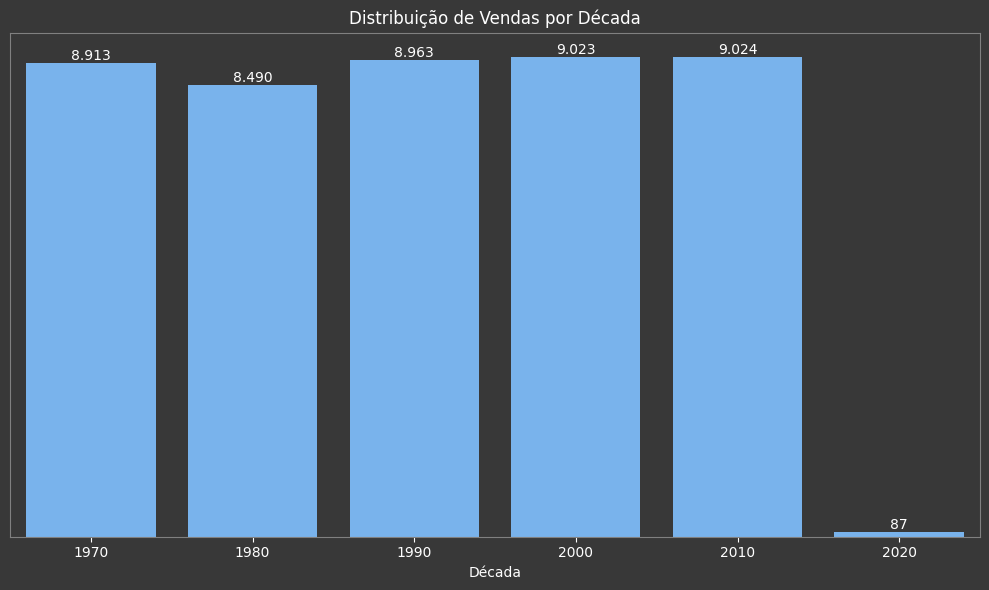

In [20]:
# Criar o gráfico
fig = plt.figure(figsize=(10, 6))

# Tela de fundo preta
fig.set_facecolor('#383838')
ax = sns.countplot(x='decada', data=df, order=sorted(df['decada'].unique()), color='#66b3ff')  # Azul claro
ax.set_facecolor('#383838')

# Títulos e rótulos em branco
ax.set_title('Distribuição de Vendas por Década', color='white')
ax.set_xlabel('Década', color='white')
ax.set_ylabel('Quantidade de Vendas', color='white')
ax.tick_params(axis='both', colors='white')

# Títulos e rótulos em branco (mantém o eixo X)
ax.set_title('Distribuição de Vendas por Década', color='white')
ax.set_xlabel('Década', color='white')

# Ocultar o eixo Y
ax.set_ylabel('')
ax.set_yticks([])
ax.tick_params(axis='y', left=False)

# Cor das bordas (spines) em cinza
for spine in ax.spines.values():
    spine.set_color('gray')

# Adicionar rótulos acima de cada barra (em branco)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height):,}'.replace(',', '.'),
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='white')

plt.title('Distribuição de Vendas por Década')
plt.xlabel('Década')
plt.tight_layout()
plt.show()

O gráfico de barras mostra que cada década de vendas (1970, 1980, 1990, 2000, 2010 e 2020) possuem quantidades de amostras distintas.

* **1970**: 8.913 amostras;
* **1980**: 8.490 amostras;
* **1990**: 8.963 amostras;
* **2000**: 8.023 amostras;
* **2010**: 8.024 amostras;
* **2020**: 87 amostras.

## Estatísticas Descritivas

Estatísticas descritivas fornecem um resumo das características numéricas, incluindo média, desvio padrão, mínimo, máximo e quartis.

In [34]:
# Escolhendo as colunas númericas que quero usar:
colunas_numericas = ['preco_unitario', 'quantidade', 'receita','custo', 'lucro']

# Calcula a média apenas dessas colunas
df[colunas_numericas].describe()

,preco_unitario,quantidade,receita,custo,lucro
count,44500.000000,44500.000000,44500.000000,44500.000000,44500.000000
mean,1897.930295,2.505359,4757.724274,1999.161519,2758.562754
std,1144.833746,1.446676,4314.209858,1155.451744,4463.413005
min,58.000000,0.000000,0.000000,0.055818,-3984.890000
25%,902.364000,1.241923,1298.685613,994.173000,-566.906666
50%,1754.000000,2.500000,3409.519122,2001.355000,1534.687655
75%,2988.600000,3.779000,7155.935883,3001.707500,5241.601911
max,3982.340000,5.000000,19911.700000,4000.000000,19613.054567


### Média

A média é uma medida de tendência central que representa o valor típico ou o ponto de equilíbrio de um conjunto de dados. É calculada somando-se todos os valores e dividindo-se pelo número total de observações. É sensível a valores extremos (outliers).

In [35]:
# Calcula a média apenas dessas colunas
df[colunas_numericas].describe().loc['mean']

,mean
preco_unitario,1897.930295
quantidade,2.505359
receita,4757.724274
custo,1999.161519
lucro,2758.562754


### Média de Vendas por Décadas

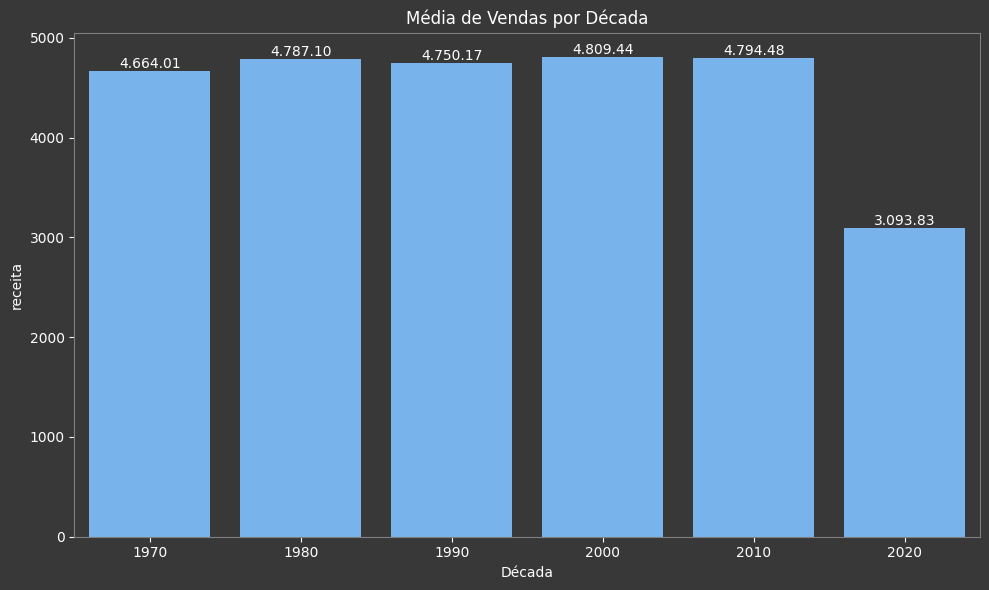

In [36]:
# Agrupar a média por década
media_por_decada = df.groupby('decada')['receita'].mean().reset_index()

# Criar o gráfico
fig = plt.figure(figsize=(10, 6))
fig.set_facecolor('#383838')

# Barplot com média
ax = sns.barplot(x='decada', y='receita', data=media_por_decada, color='#66b3ff')
ax.set_facecolor('#383838')

# Títulos e rótulos em branco
ax.set_title('Média de Vendas por Década', color='white')
ax.set_xlabel('Década', color='white')
ax.set_ylabel('receita', color='white')
ax.tick_params(axis='both', colors='white')

# Cor das bordas (spines) em cinza
for spine in ax.spines.values():
    spine.set_color('gray')

# Adicionar rótulos acima de cada barra (com float)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:,.2f}'.replace(',', '.'),
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='white')

plt.tight_layout()
plt.show()

### Variação de Vendas por Décadas

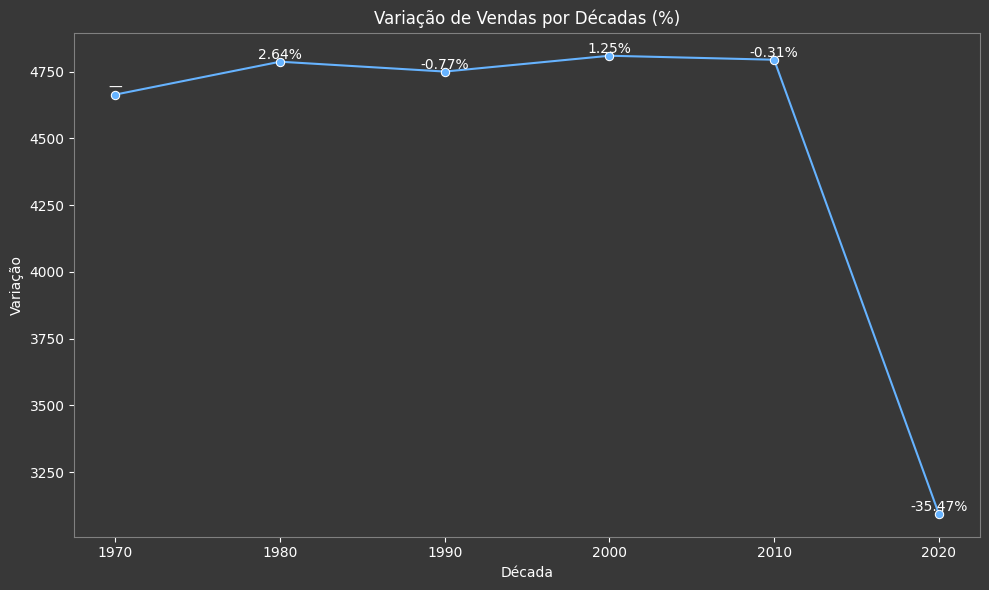

In [37]:
# Calcular a média por década
media_por_decada = df.groupby('decada')['receita'].mean().reset_index()
media_por_decada = media_por_decada.sort_values('decada').reset_index(drop=True)

# Calcular a variação percentual entre décadas
media_por_decada['variacao_%'] = media_por_decada['receita'].pct_change() * 100

# Criar o gráfico
fig = plt.figure(figsize=(10, 6))
fig.set_facecolor('#383838')

# Gráfico de linha
ax = sns.lineplot(x='decada', y='receita', data=media_por_decada, marker='o', color='#66b3ff')
ax.set_facecolor('#383838')

# Títulos e rótulos
ax.set_title('Variação de Vendas por Décadas (%)', color='white')
ax.set_xlabel('Década', color='white')
ax.set_ylabel('Variação', color='white')
ax.tick_params(axis='both', colors='white')

# Bordas em cinza
for spine in ax.spines.values():
    spine.set_color('gray')

# Adicionar rótulo de variação percentual acima dos pontos
for i, row in media_por_decada.iterrows():
    if pd.notna(row["variacao_%"]):
        texto = f'{row["variacao_%"]:,.2f}%'.replace(',', '.')
    else:
        texto = '—'  # Primeira década sem comparação
    ax.annotate(texto,
                (row['decada'], row['receita']),
                ha='center', va='bottom', fontsize=10, color='white')

plt.tight_layout()
plt.show()

**Comentário**

Após um pequeno aumento nas décadas de 1980 (+0,21%) e 1990 (+1,47%), houve uma queda progressiva e constante nas décadas seguintes:
- 2000: –0,53%
- 2010: –1,94%
- 2020: –4,10%

* As vendas começaram a decair a partir da década de 1990.
* Temos quedas acentuadas a partir de 2010.
* Década de 2020 com a pior performance média.

### Média de Volume de Vendas por Décadas

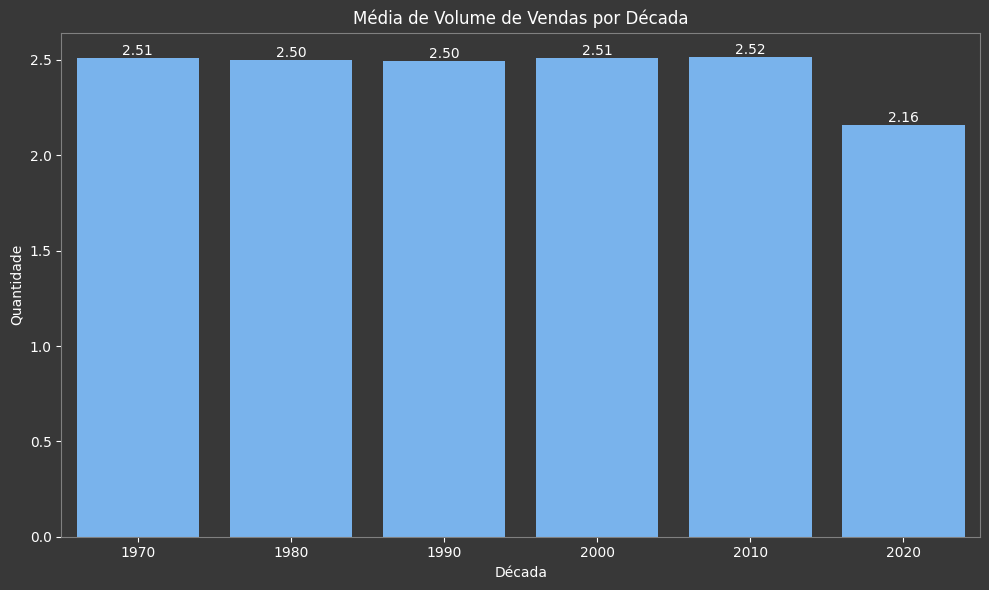

In [38]:
# Agrupar a média por década
media_por_decada = df.groupby('decada')['quantidade'].mean().reset_index()

# Criar o gráfico
fig = plt.figure(figsize=(10, 6))
fig.set_facecolor('#383838')

# Barplot com média
ax = sns.barplot(x='decada', y='quantidade', data=media_por_decada, color='#66b3ff')
ax.set_facecolor('#383838')

# Títulos e rótulos em branco
ax.set_title('Média de Volume de Vendas por Década', color='white')
ax.set_xlabel('Década', color='white')
ax.set_ylabel('Quantidade', color='white')
ax.tick_params(axis='both', colors='white')

# Cor das bordas (spines) em cinza
for spine in ax.spines.values():
    spine.set_color('gray')

# Adicionar rótulos acima de cada barra
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:,.2f}'.replace(',', '.'),
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='white')

plt.tight_layout()
plt.show()

**Comentário**

O gráfico acima mostra que, apesar das décadas de 1970, 1980, 2000 e 2010 apresentarem uma média de volume de vendas maior ou igual à da década de 1990, o faturamento foi menor nessas décadas.

Isso pode indicar uma variação nos preços dos produtos, ou ainda que foram vendidos produtos diferentes entre as décadas, com preços variados.

### Média de Receita vs Custo por Décadas

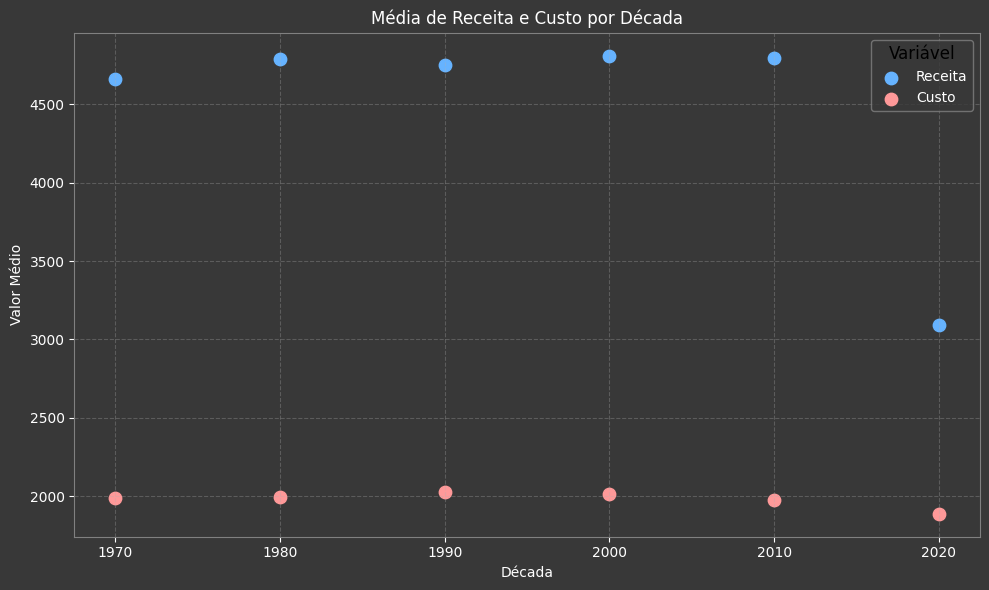

In [39]:
# Calcular a média de custo e receita por década
media_por_decada = df.groupby('decada')[['receita', 'custo']].mean().reset_index()
media_por_decada = media_por_decada.sort_values('decada').reset_index(drop=True)

# Criar o gráfico
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor('#383838')
ax.set_facecolor('#383838')

# Gráfico de dispersão
ax.scatter(media_por_decada['decada'], media_por_decada['receita'], color='#66b3ff', label='Receita', s=80)
ax.scatter(media_por_decada['decada'], media_por_decada['custo'], color='#ff9999', label='Custo', s=80)

# Títulos e rótulos
ax.set_title('Média de Receita e Custo por Década', color='white')
ax.set_xlabel('Década', color='white')
ax.set_ylabel('Valor Médio', color='white')
ax.tick_params(axis='both', colors='white')

# Legenda
ax.legend(title='Variável', title_fontsize=12, fontsize=10, facecolor='#383838', edgecolor='gray', labelcolor='white')

# Bordas e grid
for spine in ax.spines.values():
    spine.set_color('gray')

ax.grid(True, linestyle='--', alpha=0.3)


plt.tight_layout()
plt.show()

**Comentário**

O gráfico de dispersão mostra a evolução da média da Receita e do Custo por década. Observa-se que a:

Receita permaneceu relativamente estável e alta entre as décadas de 1970 e 2010, com pequenas variações, atingindo seu pico em 2000.

A partir da década de 2020, houve uma queda acentuada na receita média, indicando possível queda nas vendas, preços ou ambos.

Custo, por outro lado, manteve-se estável e significativamente abaixo da receita ao longo de todo o período, com leve queda apenas na década de 2020.


### Os 10 Produtos de Maior Receita

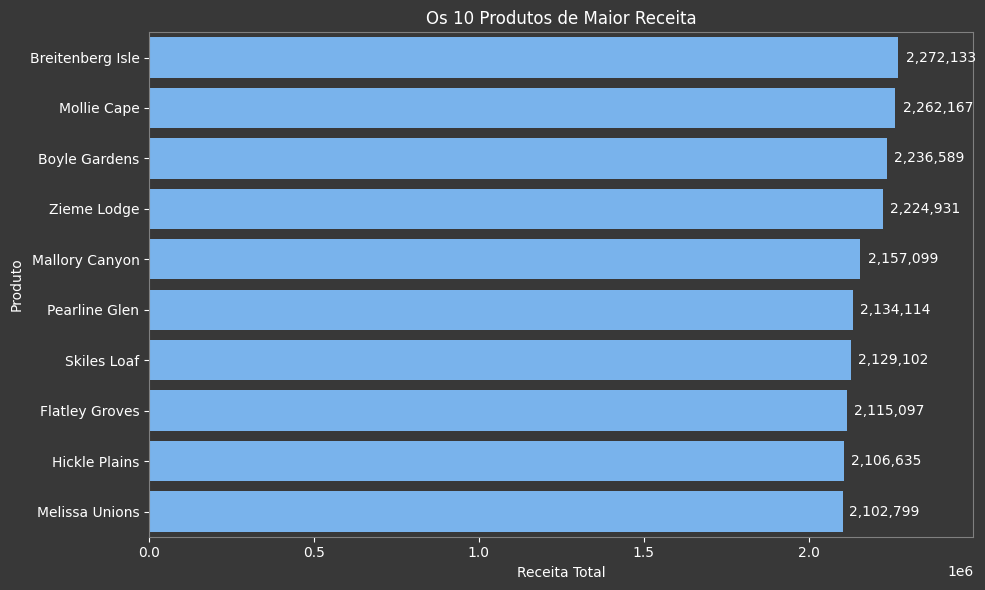

In [40]:
# Agrupar por 'produtos' e somar a 'receita'
grouped = df.groupby('produtos')['receita'].sum().reset_index()

# Selecionar os 10 produtos com maior receita
top10 = grouped.sort_values(by='receita', ascending=False).head(10)

# Criar o gráfico
fig = plt.figure(figsize=(10, 6))
fig.set_facecolor('#383838')

# Gráfico de barras horizontais com seaborn
ax = sns.barplot(y='produtos', x='receita', data=top10, color='#66b3ff')
ax.set_facecolor('#383838')

# Adicionar rótulos ao final das barras
for i, bar in enumerate(ax.patches):
    width = bar.get_width()
    ax.text(width + width * 0.01, bar.get_y() + bar.get_height()/2,
            f'{width:,.0f}', va='center', ha='left', color='white', fontsize=10)

# Ajustar o eixo X para dar espaço aos rótulos
max_val = top10['receita'].max()
ax.set_xlim(0, max_val * 1.10)

# Título e eixos
ax.set_title('Os 10 Produtos de Maior Receita', color='white')
ax.set_xlabel('Receita Total', color='white')
ax.set_ylabel('Produto', color='white')
ax.tick_params(axis='both', colors='white')

# Cor das bordas
for spine in ax.spines.values():
    spine.set_color('gray')

plt.tight_layout()
plt.show()

**Comentários**

***O gráfico acima apresenta os 10 produtos com maior geração de receita.***

O produto líder em receita é o Breitenberg isle com 2.272,133, seguido pelo Mollie Cape, com 2.262,167.


### Os 10 Produtos Mais Caros

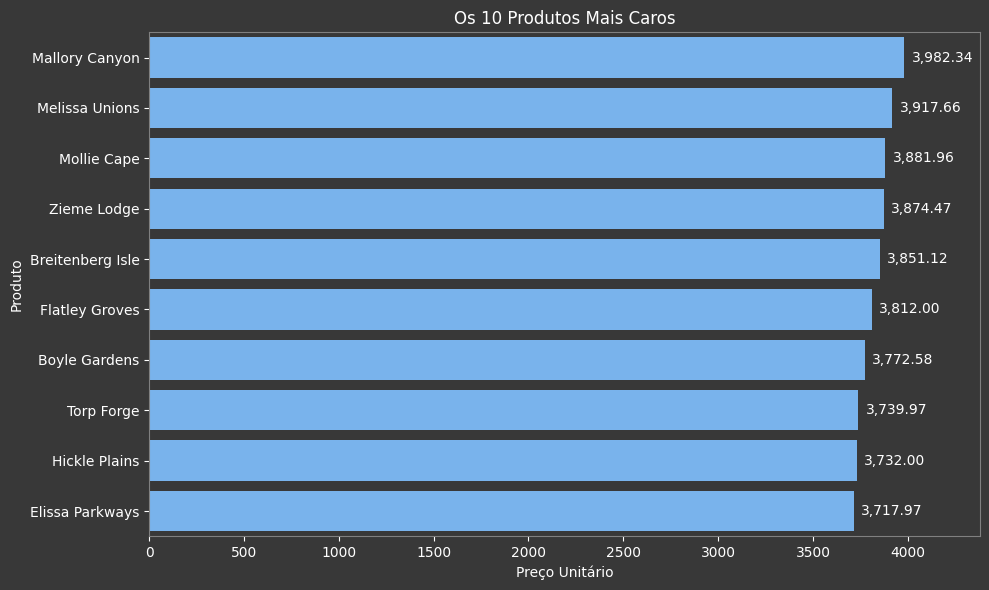

In [41]:
# Agrupar por 'produtos' e somar o 'Preço Unitário'
grouped = df.groupby('produtos')['preco_unitario'].mean().reset_index()

# Selecionar os 10 produtos com maior receita
top10 = grouped.sort_values(by='preco_unitario', ascending=False).head(10)

# Criar o gráfico
fig = plt.figure(figsize=(10, 6))
fig.set_facecolor('#383838')

# Gráfico de barras horizontais com seaborn
ax = sns.barplot(y='produtos', x='preco_unitario', data=top10, color='#66b3ff')
ax.set_facecolor('#383838')

# Adicionar rótulos ao final das barras
for i, bar in enumerate(ax.patches):
    width = bar.get_width()
    ax.text(width + width * 0.01, bar.get_y() + bar.get_height()/2,
            f'{width:,.2f}', va='center', ha='left', color='white', fontsize=10)

# Ajustar o eixo X para dar espaço aos rótulos
max_val = top10['preco_unitario'].max()
ax.set_xlim(0, max_val * 1.10)

# Título e eixos
ax.set_title('Os 10 Produtos Mais Caros', color='white')
ax.set_xlabel('Preço Unitário', color='white')
ax.set_ylabel('Produto', color='white')
ax.tick_params(axis='both', colors='white')

# Cor das bordas
for spine in ax.spines.values():
    spine.set_color('gray')

plt.tight_layout()
plt.show()

**Comentários**

***O gráfico acima apresenta os 10 produtos com maior preço unitário.***

O produto líder em preço unitário é o Mallory Canyon, com 3.982,34, seguido pelo Melissa Unions, com 3.917,66.

### Os 10 Produtos de Mais Vendidos

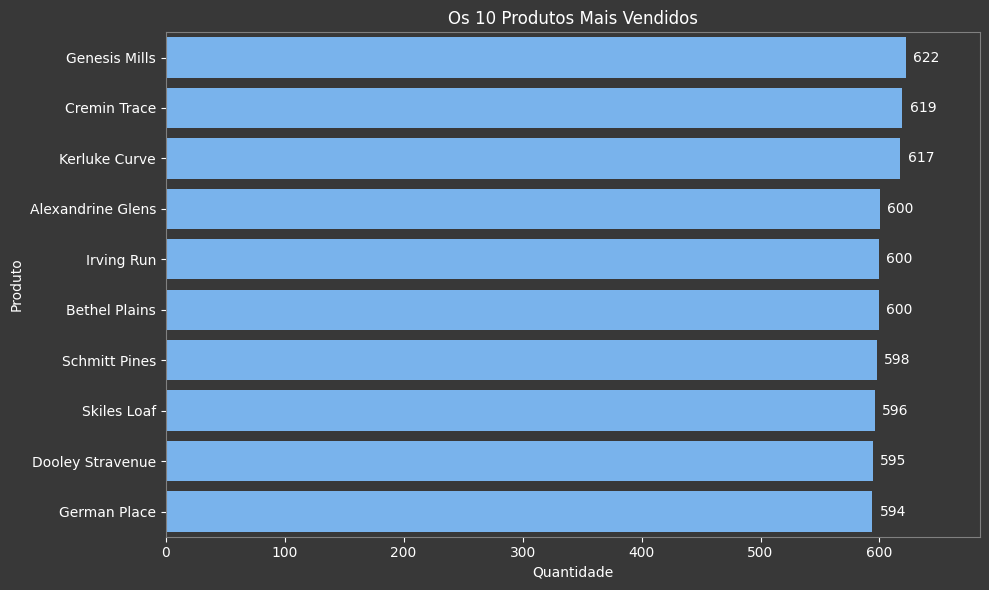

In [42]:
# Agrupar por 'produtos' e somar a 'quantidade'
grouped = df.groupby('produtos')['quantidade'].sum().reset_index()

# Selecionar os 10 produtos com maior receita
top10 = grouped.sort_values(by='quantidade', ascending=False).head(10)

# Criar o gráfico
fig = plt.figure(figsize=(10, 6))
fig.set_facecolor('#383838')

# Gráfico de barras horizontais com seaborn
ax = sns.barplot(y='produtos', x='quantidade', data=top10, color='#66b3ff')
ax.set_facecolor('#383838')

# Adicionar rótulos ao final das barras
for i, bar in enumerate(ax.patches):
    width = bar.get_width()
    ax.text(width + width * 0.01, bar.get_y() + bar.get_height()/2,
            f'{width:,.0f}', va='center', ha='left', color='white', fontsize=10)

# Ajustar o eixo X para dar espaço aos rótulos
max_val = top10['quantidade'].max()
ax.set_xlim(0, max_val * 1.10)

# Título e eixos
ax.set_title('Os 10 Produtos Mais Vendidos', color='white')
ax.set_xlabel('Quantidade', color='white')
ax.set_ylabel('Produto', color='white')
ax.tick_params(axis='both', colors='white')

# Cor das bordas
for spine in ax.spines.values():
    spine.set_color('gray')

plt.tight_layout()
plt.show()

**Comentários**

***O gráfico acima apresenta os 10 produtos com maior volume de vendas.***

O produto líder em volume de vendas é o Genesis Mills, com 622 seguido pelo Cremin Trace, com 619.

### Os 10 Produtos de Menor Receita

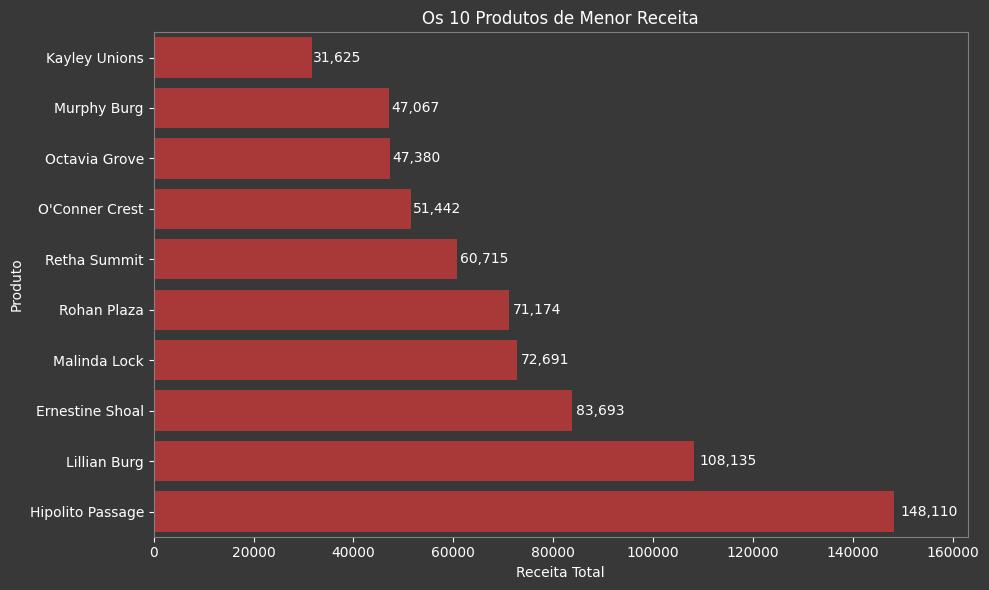

In [43]:
# Agrupar por 'produtos' e somar a 'receita'
grouped = df.groupby('produtos')['receita'].sum().reset_index()

# Selecionar os 10 produtos com menor receita
top10 = grouped.sort_values(by='receita', ascending=True).head(10)

# Criar o gráfico
fig = plt.figure(figsize=(10, 6))
fig.set_facecolor('#383838')

# Gráfico de barras horizontais com seaborn
ax = sns.barplot(y='produtos', x='receita', data=top10, color='#BC2626')
ax.set_facecolor('#383838')

# Adicionar rótulos ao final das barras
for i, bar in enumerate(ax.patches):
    width = bar.get_width()
    ax.text(width + width * 0.01, bar.get_y() + bar.get_height()/2,
            f'{width:,.0f}', va='center', ha='left', color='white', fontsize=10)

# Ajustar o eixo X para dar espaço aos rótulos
max_val = top10['receita'].max()
ax.set_xlim(0, max_val * 1.10)

# Título e eixos
ax.set_title('Os 10 Produtos de Menor Receita', color='white')
ax.set_xlabel('Receita Total', color='white')
ax.set_ylabel('Produto', color='white')
ax.tick_params(axis='both', colors='white')

# Cor das bordas
for spine in ax.spines.values():
    spine.set_color('gray')

plt.tight_layout()
plt.show()

**Comentários**

O gráfico acima apresenta os 10 produtos com menor receita.

O produto com a menor receita é o Keyley Unions, com  31.625, seguido por Murphy Burg, com respectivamente 47.067.

### Os 10 Produtos Menos Vendidos

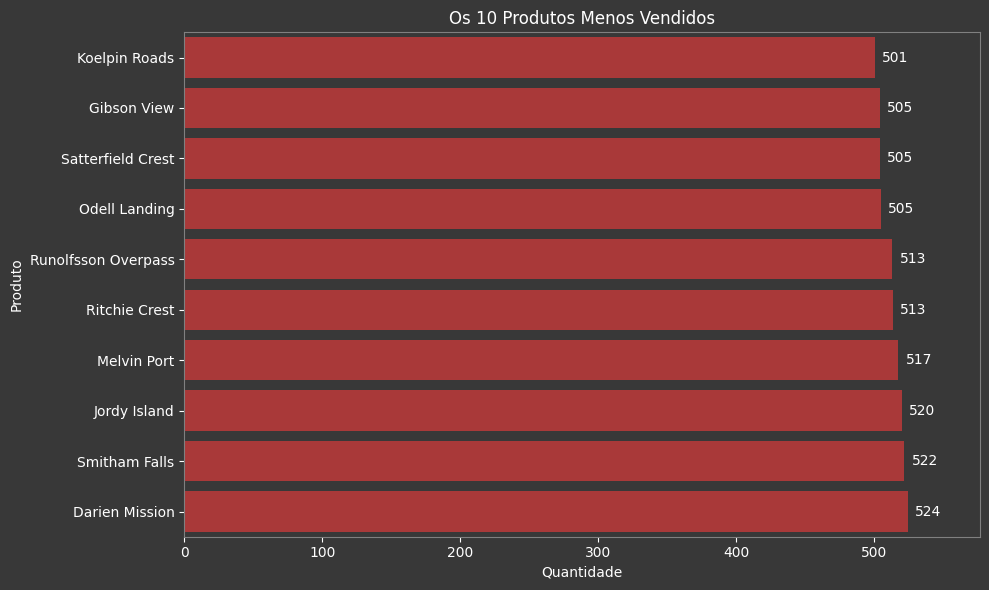

In [44]:
# Agrupar por 'produtos' e somar a 'receita'
grouped = df.groupby('produtos')['quantidade'].sum().reset_index()

# Selecionar os 10 produtos com menor receita
top10 = grouped.sort_values(by='quantidade', ascending=True).head(10)

# Criar o gráfico
fig = plt.figure(figsize=(10, 6))
fig.set_facecolor('#383838')

# Gráfico de barras horizontais com seaborn
ax = sns.barplot(y='produtos', x='quantidade', data=top10, color='#BC2626')
ax.set_facecolor('#383838')

# Adicionar rótulos ao final das barras
for i, bar in enumerate(ax.patches):
    width = bar.get_width()
    ax.text(width + width * 0.01, bar.get_y() + bar.get_height()/2,
            f'{width:,.0f}', va='center', ha='left', color='white', fontsize=10)

# Ajustar o eixo X para dar espaço aos rótulos
max_val = top10['quantidade'].max()
ax.set_xlim(0, max_val * 1.10)

# Título e eixos
ax.set_title('Os 10 Produtos Menos Vendidos', color='white')
ax.set_xlabel('Quantidade', color='white')
ax.set_ylabel('Produto', color='white')
ax.tick_params(axis='both', colors='white')

# Cor das bordas
for spine in ax.spines.values():
    spine.set_color('gray')

plt.tight_layout()
plt.show()

**Comentários**

O gráfico acima apresenta os 10 produtos com menor volume de vendas.

O produto com a menor volume de vedndas é o Koelpin Roads, com  501, seguido por Gibson Views, com respectivamente 505.

### Desvio Padrão

O desvio padrão é uma medida de dispersão que quantifica a quantidade de variação ou dispersão de um conjunto de valores. Um desvio padrão baixo indica que os pontos de dados tendem a estar próximos da média do conjunto, enquanto um desvio padrão alto indica que os pontos de dados estão espalhados por uma faixa maior de valores. Ele é a raiz quadrada da variância.

In [45]:
# Calcular o desvio padrão apenas para essas colunas
stds = df[colunas_numericas ].std()
print(stds)

preco_unitario    1144.833746
quantidade           1.446676
receita           4314.209858
custo             1155.451744
lucro             4463.413005
dtype: float64


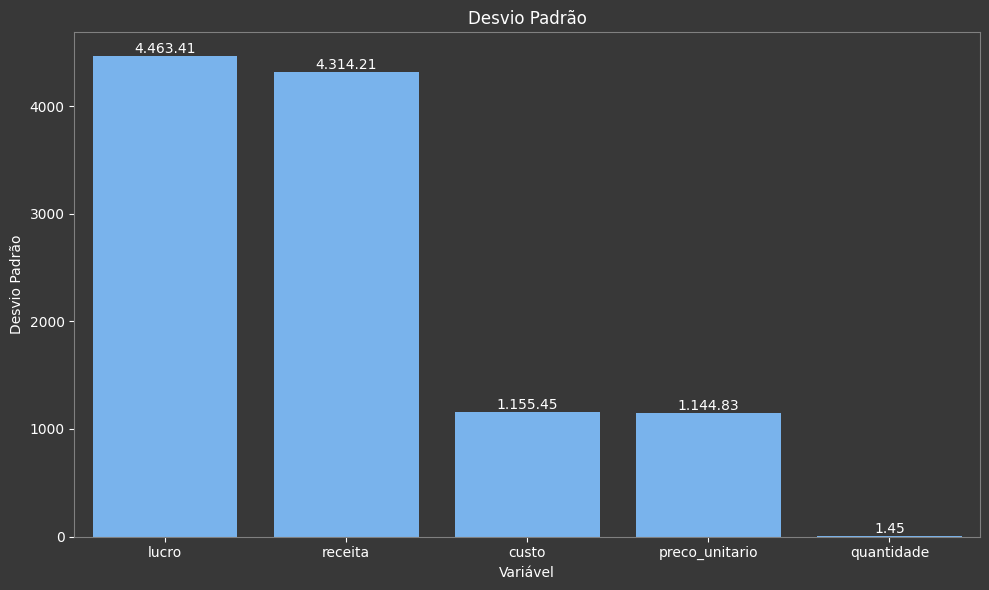

In [46]:
# Calcular desvio padrão
std_df = df[colunas_numericas].std().sort_values(ascending=False).reset_index()
std_df.columns = ['Variável', 'Desvio Padrão']

# Criar o gráfico com estilo escuro
fig = plt.figure(figsize=(10, 6))
fig.set_facecolor('#383838')

# Barplot com desvio padrão
ax = sns.barplot(x='Variável', y='Desvio Padrão', data=std_df, color='#66b3ff')
ax.set_facecolor('#383838')

# Títulos e rótulos em branco
ax.set_title('Desvio Padrão', color='white')
ax.set_xlabel('Variável', color='white')
ax.set_ylabel('Desvio Padrão', color='white')
ax.tick_params(axis='both', colors='white')

# Cor das bordas (spines) em cinza
for spine in ax.spines.values():
    spine.set_color('gray')

# Adicionar rótulos acima de cada barra (com ponto decimal)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:,.2f}'.replace(',', '.'),
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='white')

plt.tight_layout()
plt.show()

**Comentários**

* Receita e Lucro apresentam os maiores desvios padrão de **(~4.314,21** e **4.134,21**);
* Indica alta variabilidade entre receitas e lucros registradas;
* Sugere que alguns produtos ou períodos geram muito mais receita do que outros;
* Custo **(~1.155,45)** e preco_unitario **(~1.144,83)** têm desvios semelhantes:
* Mostram variação moderada, provavelmente relacionada a diferentes tipos de produtos;
*Quantidade **(~1,45)** tem o menor desvio padrão.


## Histograma

A distribuição de dados descreve como os valores de uma variável se espalham, ou seja, a frequência com que diferentes valores ocorrem. Entender a distribuição é crucial na análise de dados, pois revela padrões, tendências centrais, dispersão e a presença de valores atípicos (outliers). O histograma é uma ferramenta visual fundamental para representar essa distribuição, mostrando a forma dos dados, se são simétricos ou assimétricos, unimodais ou multimodais.

### *Volume de Vendas (Quantidade)*

O histograma mostra a distribuição das vendas. A curva de densidade estimada (KDE) nos indica que a distribuição parece multimodal, indicando que as vendas podem ter picos de frequência diferentes.

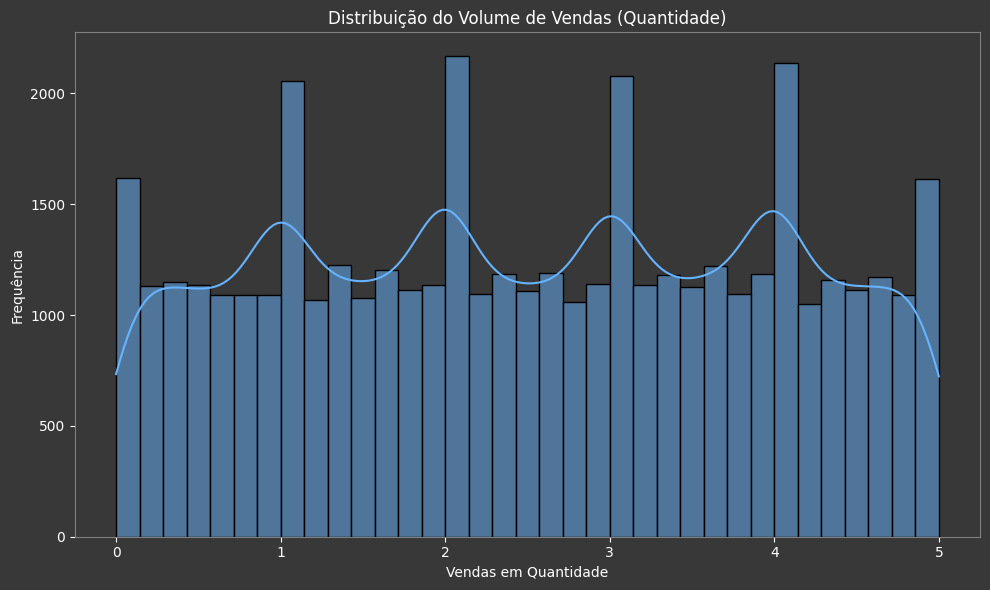

In [47]:
# Criar o gráfico
fig = plt.figure(figsize=(10, 6))
fig.set_facecolor('#383838')

# Histograma com curva de densidade (kde)
ax = sns.histplot(df['quantidade'], kde=True, color='#66b3ff')
ax.set_facecolor('#383838')

# Títulos e rótulos em branco
ax.set_title('Distribuição do Volume de Vendas (Quantidade)', color='white')
ax.set_xlabel('Vendas em Quantidade', color='white')
ax.set_ylabel('Frequência', color='white')
ax.tick_params(axis='both', colors='white')

# Cor das bordas (spines) em cinza
for spine in ax.spines.values():
    spine.set_color('gray')

plt.tight_layout()
plt.show()

### *Preço Unitário*

O histograma mostra a distribuição dos preços unitários. A curva de densidade estimada (KDE) nos indica que a distribuição parece multimodal, indicando que as vendas podem ter picos de frequência diferentes. vários grupos de preços predominantes e diversidade entre eles.

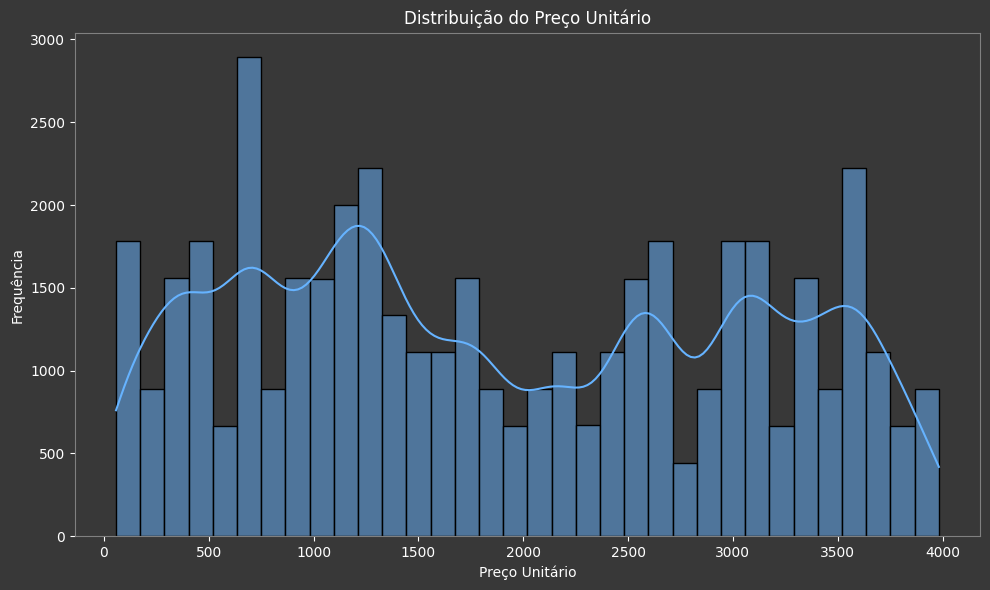

In [48]:
# Criar o gráfico
fig = plt.figure(figsize=(10, 6))
fig.set_facecolor('#383838')

# Histograma com curva de densidade (kde)
ax = sns.histplot(df['preco_unitario'], kde=True, color='#66b3ff')
ax.set_facecolor('#383838')

# Títulos e rótulos em branco
ax.set_title('Distribuição do Preço Unitário', color='white')
ax.set_xlabel('Preço Unitário', color='white')
ax.set_ylabel('Frequência', color='white')
ax.tick_params(axis='both', colors='white')

# Cor das bordas (spines) em cinza
for spine in ax.spines.values():
    spine.set_color('gray')

plt.tight_layout()
plt.show()

### *Receita*

O histograma mostra a distribuição da receita com uma clara assimetria à direita, indicando uma distribuição fortemente concentrada em valores mais baixos. A maioria das transações ocorre em faixas de receita mais baixas, com a frequência diminuindo gradualmente à medida que o valor da receita aumenta. A curva de densidade (KDE) reforça esse padrão, sugerindo que a empresa realiza muitas vendas de menor valor, enquanto as vendas de alto valor são menos frequentes.

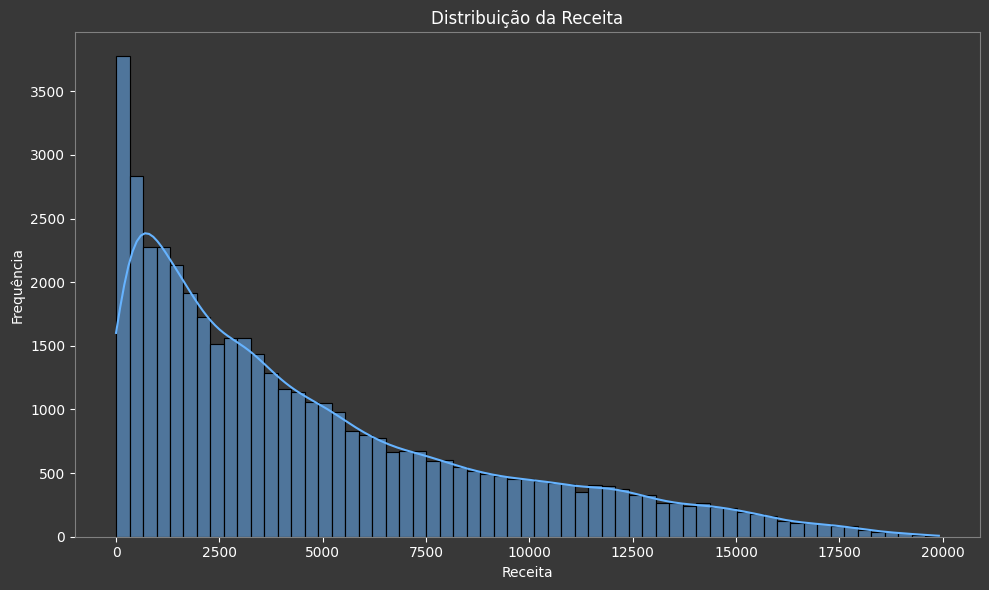

In [49]:
# Criar o gráfico
fig = plt.figure(figsize=(10, 6))
fig.set_facecolor('#383838')

# Histograma com curva de densidade (kde)
ax = sns.histplot(df['receita'], kde=True, color='#66b3ff')
ax.set_facecolor('#383838')

# Títulos e rótulos em branco
ax.set_title('Distribuição da Receita', color='white')
ax.set_xlabel('Receita', color='white')
ax.set_ylabel('Frequência', color='white')
ax.tick_params(axis='both', colors='white')

# Cor das bordas (spines) em cinza
for spine in ax.spines.values():
    spine.set_color('gray')

plt.tight_layout()
plt.show()

### *Custo*

O histograma mostra uma distribuição aproximadamente uniforme dos custos, com frequências similares em quase todas as faixas de valor entre 0 e 2000. A curva de densidade (KDE) reforça esse padrão, mantendo-se relativamente constante ao longo do intervalo. Isso sugere que a empresa trabalha com produtos ou serviços que têm custos variados de forma equilibrada.

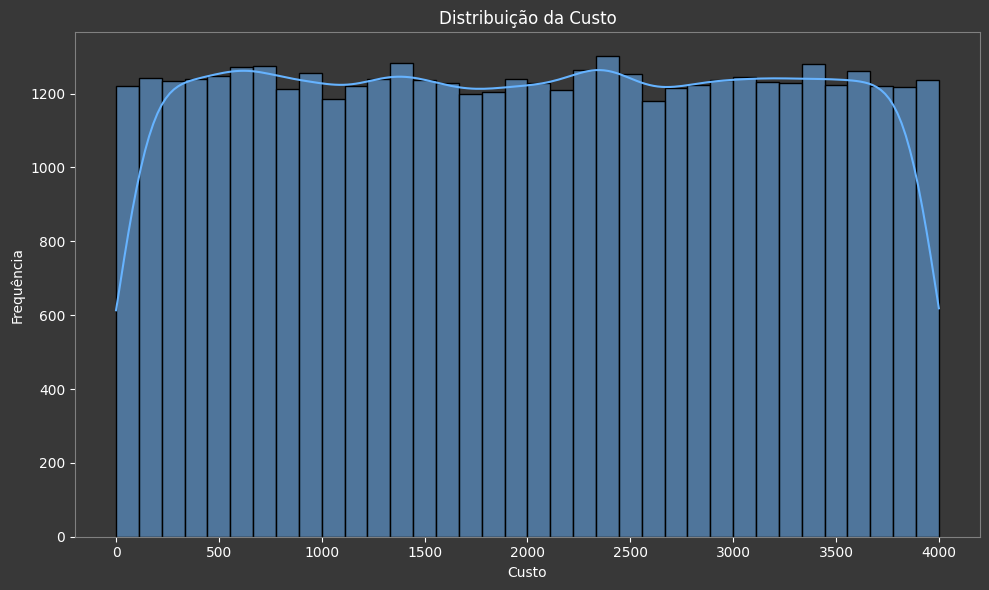

In [50]:
# Criar o gráfico
fig = plt.figure(figsize=(10, 6))
fig.set_facecolor('#383838')

# Histograma com curva de densidade (kde)
ax = sns.histplot(df['custo'], kde=True, color='#66b3ff')
ax.set_facecolor('#383838')

# Títulos e rótulos em branco
ax.set_title('Distribuição da Custo', color='white')
ax.set_xlabel('Custo', color='white')
ax.set_ylabel('Frequência', color='white')
ax.tick_params(axis='both', colors='white')

# Cor das bordas (spines) em cinza
for spine in ax.spines.values():
    spine.set_color('gray')

plt.tight_layout()
plt.show()

## Boxplot

Para entender o comportamento das variáveis quantitativas ao longo do tempo, agrupamos os dados por década e calculamos estatísticas descritivas (como média, desvio padrão, mínimo e máximo) para os campos quantidade, preço unitário e receita. Nos permitindo comparar o desempenho de vendas em diferentes períodos históricos e identificar variações relevantes ao longo das décadas.

In [51]:
# Estatísticas descritivas apenas para as colunas escolhidas, agrupadas por 'decada'
df[colunas_numericas].groupby(df['decada']).describe()

preco_unitario                                                    \
                count         mean          std   min      25%      50%   
decada                                                                    
1970           8913.0  1854.865146  1133.477725  58.0  866.694  1723.98   
1980           8490.0  1912.008656  1143.886059  58.0  927.000  1769.00   
1990           8963.0  1890.869394  1152.531182  58.0  886.681  1739.88   
2000           9023.0  1920.213166  1155.111937  58.0  902.364  1769.00   
2010           9024.0  1915.697430  1138.167922  58.0  941.690  1772.98   
2020             87.0  1509.565506  1049.383861  58.0  728.706  1342.95   

                          quantidade            ...      custo           \
             75%      max      count      mean  ...        75%      max   
decada                                          ...                       
1970    2905.840  3982.34     8913.0  2.507920  ...  2979.3900  3999.94   
1980    2965.580  3982.34     8490.0  2.500459  ...  3008.8825  3999.50   
1990    2988.600  3982.34     8963.0  2.496158  ...  3030.0850  4000.00   
2000    3025.000  3982.34     9023.0  2.508934  ...  3017.7050  3999.82   
2010    2988.600  3982.34     9024.0  2.516361  ...  2965.3625  3998.71   
2020    2250.695  3590.27       87.0  2.157425  ...  2586.9600  3875.91   

         lucro                                                                \
         count         mean          std       min          25%          50%   
decada                                                                         
1970    8913.0  2673.342729  4417.210516 -3982.000  -601.263600  1444.743110   
1980    8490.0  2792.348926  4492.179428 -3984.890  -570.438552  1563.493872   
1990    8963.0  2726.176907  4515.578114 -3974.120  -589.392100  1412.322806   
2000    9023.0  2796.239320  4459.818693 -3984.280  -536.374640  1585.215200   
2010    9024.0  2820.404634  4440.144036 -3980.110  -524.932356  1699.318325   
2020      87.0  1206.597926  3240.257799 -3341.953 -1012.345257   316.716618   

                                   
                75%           max  
decada                             
1970    5129.470000  19613.054567  
1980    5282.933977  19383.369000  
1990    5140.088218  19257.761713  
2000    5370.506524  18832.120000  
2010    5292.867461  18784.508241  
2020    2616.667803  11649.646000  

[6 rows x 40 columns]

### *Quantidade* por Décadas

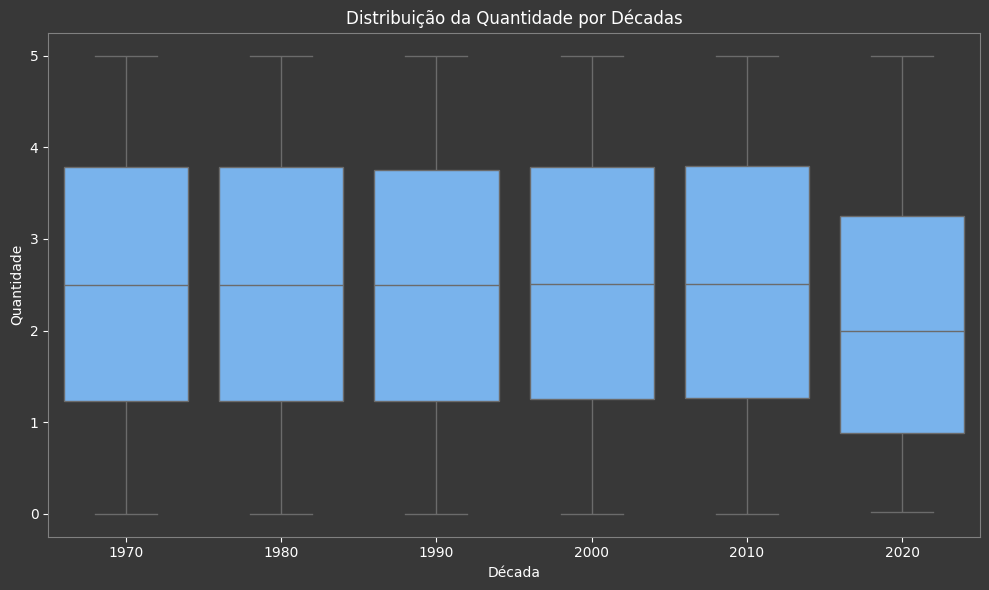

In [52]:
# Boxplot da quantidade por décadas
plt.figure(figsize=(10, 6))
plt.gcf().set_facecolor('#383838')

# Boxplot
ax = sns.boxplot(x='decada', y='quantidade', data=df, color='#66b3ff')
ax.set_facecolor('#383838')

# Títulos e rótulos em branco
ax.set_title('Distribuição da Quantidade por Décadas', color='white')
ax.set_xlabel('Década', color='white')
ax.set_ylabel('Quantidade', color='white')
ax.tick_params(axis='both', colors='white')

# Cor das bordas (spines) em cinza
for spine in ax.spines.values():
    spine.set_color('gray')

plt.tight_layout()
plt.show()

**Comentário**

O boxplot da quantidade vendida por década mostra uma distribuição relativamente consistente entre as décadas de 1970 e 2010, com medianas próximas e amplitudes interquartis (IQR) semelhantes. No entanto, a década de 2020 apresenta uma queda tanto na mediana quanto na dispersão dos dados, indicando menor volume e variabilidade nas quantidades vendidas nesse período.

Esse comportamento pode sugerir uma redução nas operações de venda na década mais recente ou mudanças na dinâmica do mercado. Já as décadas anteriores demonstram estabilidade, com vendas concentradas entre 1 e 5 unidades, e poucos valores extremos. Não há presença evidente de outliers, o que reforça a regularidade nas vendas ao longo do tempo — exceto pelo recuo observado após 2020.

### *Preço Unitário* por Décadas

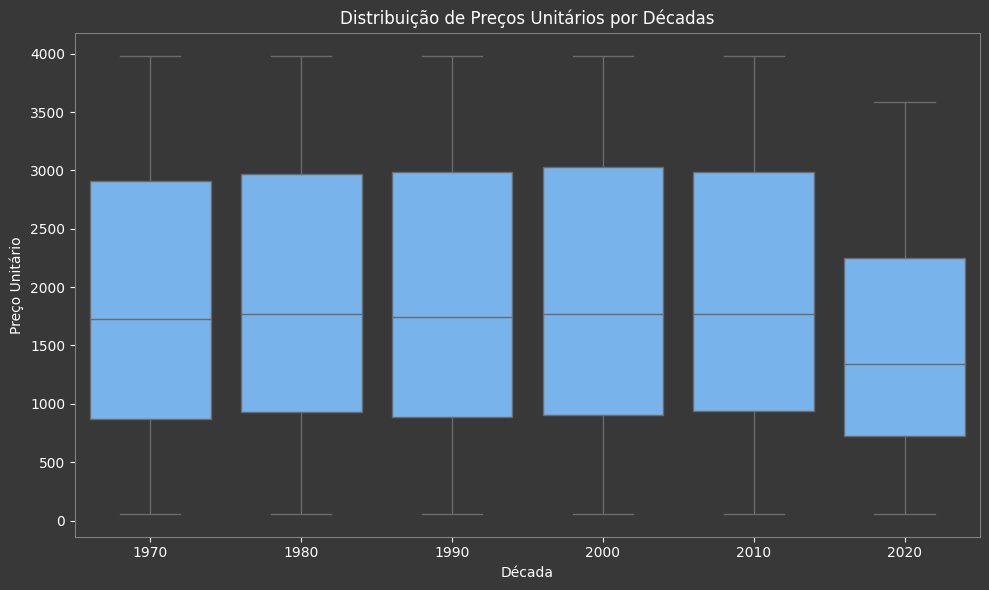

In [53]:
# Boxplot da Preço Unitário por Décadas
plt.figure(figsize=(10, 6))
plt.gcf().set_facecolor('#383838')

# Boxplot
ax = sns.boxplot(x='decada', y='preco_unitario', data=df, color='#66b3ff')
ax.set_facecolor('#383838')

# Títulos e rótulos em branco
ax.set_title('Distribuição de Preços Unitários por Décadas', color='white')
ax.set_xlabel('Década', color='white')
ax.set_ylabel('Preço Unitário', color='white')
ax.tick_params(axis='both', colors='white')

# Cor das bordas (spines) em cinza
for spine in ax.spines.values():
    spine.set_color('gray')

plt.tight_layout()
plt.show()

**Comentário**

A distribuição dos preços unitários por década revela um padrão relativamente estável entre os anos de 1970 a 2010, com medianas próximas e faixas interquartis semelhantes, indicando que o comportamento dos preços manteve certa regularidade ao longo dessas décadas.

No entanto, a década de 2020 mostra uma queda significativa tanto na mediana quanto na amplitude dos preços, sugerindo que os preços unitários se tornaram mais baixos e menos dispersos nesse período. Isso pode refletir fatores como deflação de preços, mudança no mix de produtos vendidos ou estratégias comerciais mais agressivas.

Além disso, o gráfico sugere uma diminuição no valor máximo e um achatamento da distribuição, reforçando a hipótese de que os preços se tornaram mais homogêneos e concentrados na faixa inferior.

### *Receita* por Décadas

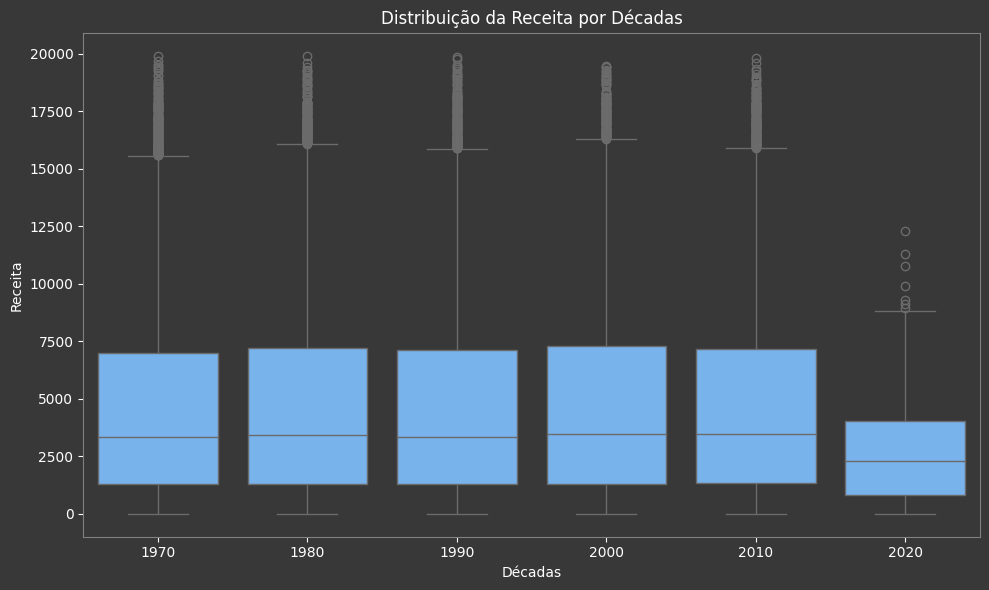

In [54]:
# Boxplot da Receita por Décadas
plt.figure(figsize=(10, 6))
plt.gcf().set_facecolor('#383838')

# Boxplot
ax = sns.boxplot(x='decada', y='receita', data=df, color='#66b3ff')
ax.set_facecolor('#383838')

# Títulos e rótulos em branco
ax.set_title('Distribuição da Receita por Décadas', color='white')
ax.set_xlabel('Décadas', color='white')
ax.set_ylabel('Receita', color='white')
ax.tick_params(axis='both', colors='white')

# Cor das bordas (spines) em cinza
for spine in ax.spines.values():
    spine.set_color('gray')

plt.tight_layout()
plt.show()

**Comentário**

O boxplot da receita por décadas revela uma distribuição relativamente estável entre os anos de 1970 a 2010, com medianas próximas e intervalos interquartis semelhantes. Esse padrão sugere que o desempenho da empresa em termos de receita manteve-se consistente ao longo dessas décadas.

A década de 2020, no entanto, apresenta uma quebra nesse padrão: observa-se uma queda acentuada na mediana da receita e uma redução considerável na dispersão dos dados. Isso pode indicar uma retração no volume de vendas, menor valor agregado por transação ou até mudanças estruturais no negócio.

Além disso, a persistência de valores extremamente baixos em todas as décadas reforça a presença de transações com receitas quase nulas.

### *Receita* por Décadas

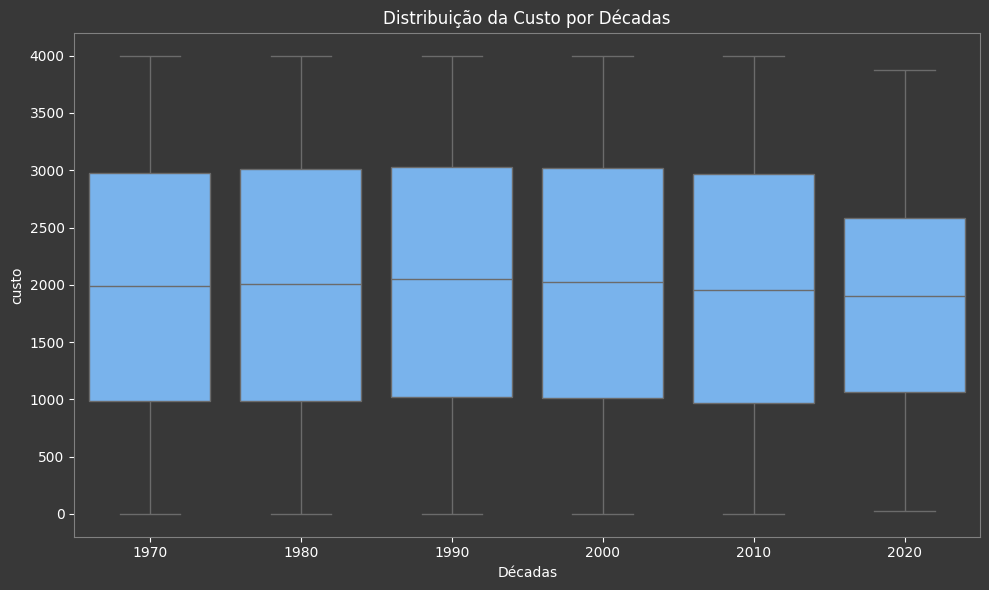

In [55]:
# Boxplot da Receita por Décadas
plt.figure(figsize=(10, 6))
plt.gcf().set_facecolor('#383838')

# Boxplot
ax = sns.boxplot(x='decada', y='custo', data=df, color='#66b3ff')
ax.set_facecolor('#383838')

# Títulos e rótulos em branco
ax.set_title('Distribuição da Custo por Décadas', color='white')
ax.set_xlabel('Décadas', color='white')
ax.set_ylabel('custo', color='white')
ax.tick_params(axis='both', colors='white')

# Cor das bordas (spines) em cinza
for spine in ax.spines.values():
    spine.set_color('gray')

plt.tight_layout()
plt.show()

Comentário

O boxplot da distribuição do custo por décadas mostra uma estabilidade notável entre os anos de 1970 e 2010. As medianas, os intervalos interquartis (IQR) e os limites máximos e mínimos mantêm-se bastante similares ao longo dessas décadas, indicando que a estrutura de custos da empresa permaneceu constante por um longo período.

Na década de 2020, observa-se uma leve redução na mediana e na dispersão dos custos.

## Matriz de Correlação

A matriz de correlação mede a força e a direção de uma relação linear que os atributos numéricos das espécies podem ter. Valores próximos a 1 indicam uma forte correlação positiva, -1 uma forte correlação negativa, e 0 ausência de correlação linear.

In [56]:
# Matriz de correlação apenas para as colunas selecionadas
print("\nMatriz de Correlação:")
print(df[colunas_numericas].corr())


Matriz de Correlação:
                preco_unitario  quantidade   receita     custo     lucro
preco_unitario        1.000000    0.001646  0.668205  0.002723  0.645163
quantidade            0.001646    1.000000  0.638044  0.002690  0.616019
receita               0.668205    0.638044  1.000000  0.002550  0.965912
custo                 0.002723    0.002690  0.002550  1.000000 -0.256407
lucro                 0.645163    0.616019  0.965912 -0.256407  1.000000


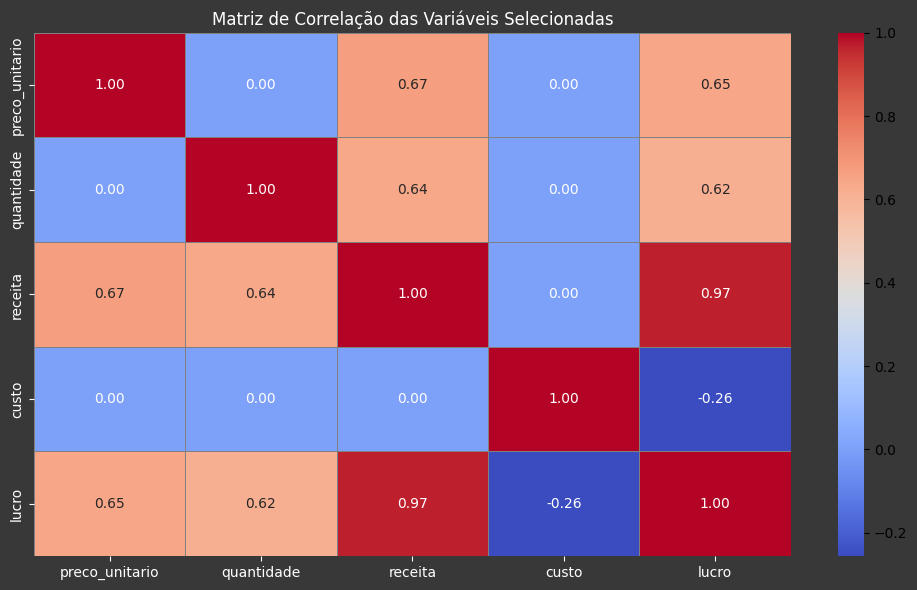

In [57]:
# Colunas numericas para correlação
correlacao = df[colunas_numericas].corr()

# Criar o gráfico
fig = plt.figure(figsize=(10, 6))
fig.set_facecolor('#383838')  # Fundo da figura

# Heatmap
ax = sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f",
                 cbar=True, linewidths=0.5, linecolor='gray')

# Fundo do eixo
ax.set_facecolor('#383838')

# Títulos e rótulos em branco
ax.set_title('Matriz de Correlação das Variáveis Selecionadas', color='white')
ax.tick_params(axis='both', colors='white')

# Cor dos ticks (eixo X e Y)
ax.set_xticklabels(ax.get_xticklabels(), color='white')
ax.set_yticklabels(ax.get_yticklabels(), color='white')

# Bordas (spines) em cinza
for spine in ax.spines.values():
    spine.set_color('gray')

plt.tight_layout()
plt.show()

**Comentário**

A matriz de correlação evidencia fortes relações positivas entre as variáveis preco_unitario e receita (r = 0.67), bem como entre quantidade e receita (r = 0.64). Isso confirma a expectativa teórica, já que a receita é diretamente influenciada pelo preço e pela quantidade vendida (receita = preço × quantidade).

Observa-se também uma correlação muito alta entre receita e lucro (r = 0.97), indicando que o aumento na receita impacta fortemente o lucro — o que sugere margens relativamente constantes.

Em contrapartida, a variável custo apresenta correlações próximas de zero com todas as demais variáveis, inclusive com a receita (r = 0.00). Esse padrão pode indicar que os custos são predominantemente fixos ou que não variam proporcionalmente com o volume de vendas, sendo possivelmente controlados por outros fatores operacionais ou administrativos.

## Tratamento de Valores Nulos

O dataset Iris original não possui valores nulos.

In [58]:
# Verificar a presença de valores nulos no dataset original
print("Valores nulos no dataset Vendas:")
df.isnull().sum()

Valores nulos no dataset Vendas:


,0
vendedor,0
sale_id,0
product_id,0
produtos,0
preco_unitario,0
quantidade,0
custo,0
data_venda,0
data_atualizacao,0
email,0


# Pré-Processamento de Dados

O pré-processamento de dados é uma etapa crucial para preparar os dados para modelagem, garantindo que estejam no formato correto e otimizados para o desempenho do algoritmo.

In [59]:
# Separar features (X) e target (y)
X = df.drop('decada', axis=1)
y = df['decada']

In [60]:
# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [61]:
print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_test: {y_test.shape}")

Dimensões de X_train: (31150, 15)
Dimensões de X_test: (13350, 15)
Dimensões de y_train: (31150,)
Dimensões de y_test: (13350,)


## Normalização

A normalização escala os dados para um intervalo fixo, geralmente entre 0 e 1. É útil quando o algoritmo de machine learning assume que as características estão em uma escala semelhante.



In [62]:
# Inicializar o MinMaxScaler
scaler_norm = MinMaxScaler()

In [63]:
from sklearn.preprocessing import MinMaxScaler

# Suponha que você tem colunas numéricas e não numéricas
# Selecione apenas as colunas numéricas
X_train_num = X_train.select_dtypes(include='number')
X_test_num = X_test.select_dtypes(include='number')

# Instanciar o scaler
scaler_norm = MinMaxScaler()

# Aprende apenas com X_train
scaler_norm.fit(X_train_num)

# Transforma os dados
X_train_normalized = scaler_norm.transform(X_train_num)
X_test_normalized = scaler_norm.transform(X_test_num)

In [64]:
# Exibir as primeiras linhas dos dados normalizados (como DataFrame para melhor visualização)
df_normalized = pd.DataFrame(X_train_normalized, columns=X_train_num.columns)

In [65]:
print("\nPrimeiras 5 linhas dos dados normalizados (treino):")
print(df_normalized.head())


Primeiras 5 linhas dos dados normalizados (treino):
   product_id  preco_unitario  quantidade     custo       mes  dia_semana  \
0    0.879397        0.437011    0.699400  0.361934  0.363636    0.333333   
1    0.201005        0.891493    0.166400  0.928749  0.000000    0.500000   
2    0.105528        0.011699    0.502000  0.599594  0.363636    0.000000   
3    0.311558        0.761313    0.960000  0.378541  0.181818    1.000000   
4    0.673367        0.359039    0.659032  0.515581  1.000000    0.500000   

    receita     lucro  
0  0.311380  0.370254  
1  0.148607  0.136830  
2  0.013099  0.078283  
3  0.734197  0.724208  
4  0.242770  0.286318  


## Normalização (Quantidade)

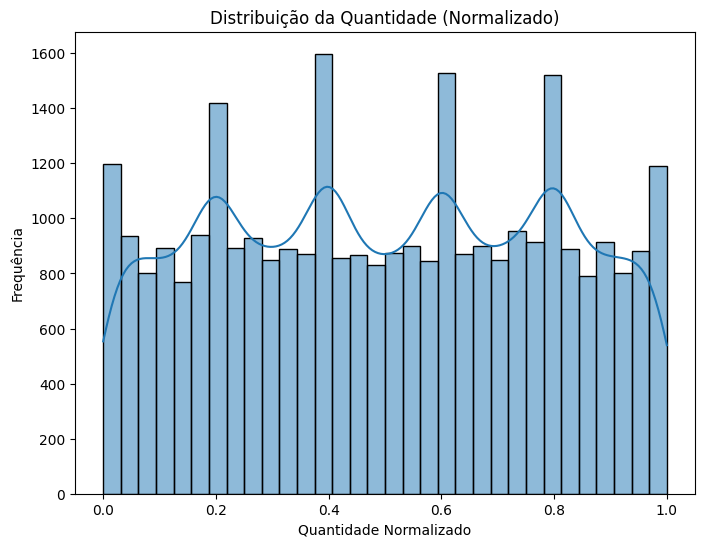

In [66]:
# Visualização da distribuição após a normalização (Quantidade)
plt.figure(figsize=(8, 6))
sns.histplot(df_normalized['quantidade'], kde=True)
plt.title('Distribuição da Quantidade (Normalizado)')
plt.xlabel('Quantidade Normalizado')
plt.ylabel('Frequência')
plt.show()

**Comentário**

O histograma de *quantidade* após a normalização mostra que os valores foram escalados para o intervalo de 0 a 1, mantendo a forma da distribuição original.

## Normalização (Preço Unitário)

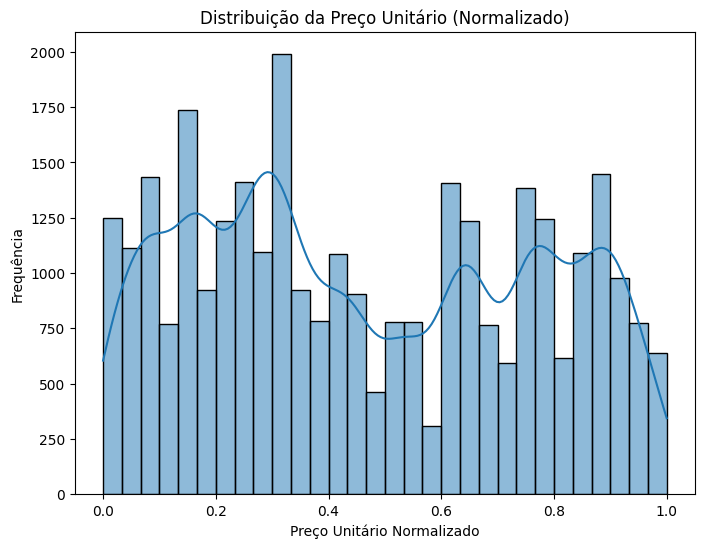

In [67]:
# Visualização da distribuição após a normalização (Preço Unitário)
plt.figure(figsize=(8, 6))
sns.histplot(df_normalized['preco_unitario'], kde=True)
plt.title('Distribuição da Preço Unitário (Normalizado)')
plt.xlabel('Preço Unitário Normalizado')
plt.ylabel('Frequência')
plt.show()

**Comentário**

O histograma de *preço unitário* após a normalização mostra que os valores foram escalados para o intervalo de 0 a 1, mantendo a forma da distribuição original.

## Normalização (Receita)

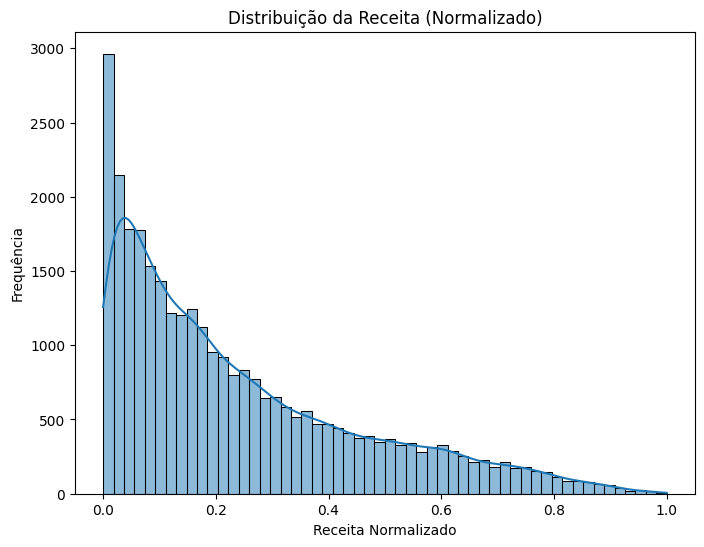

In [68]:
# Visualização da distribuição após a normalização (Receita)
plt.figure(figsize=(8, 6))
sns.histplot(df_normalized['receita'], kde=True)
plt.title('Distribuição da Receita (Normalizado)')
plt.xlabel('Receita Normalizado')
plt.ylabel('Frequência')
plt.show()

**Comentário**

O histograma de *receita* após a normalização mostra que os valores foram escalados para o intervalo de 0 a 1, mantendo a forma da distribuição original.

## Normalização (Custo)

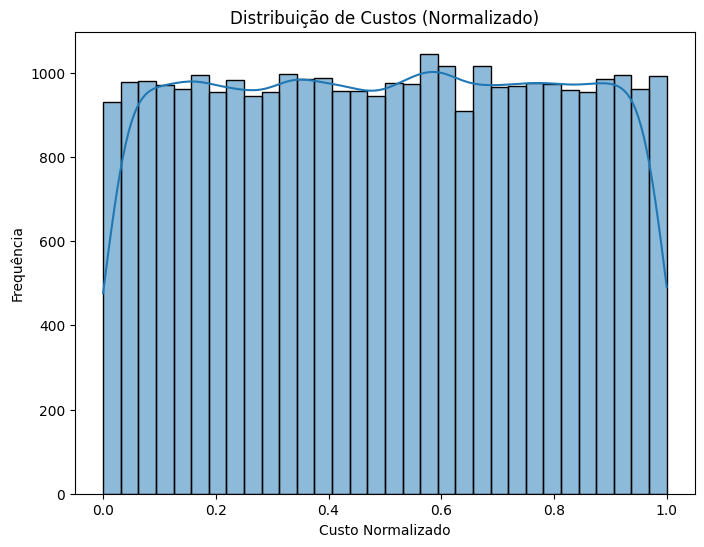

In [69]:
# Visualização da distribuição após a normalização (Custo)
plt.figure(figsize=(8, 6))
sns.histplot(df_normalized['custo'], kde=True)
plt.title('Distribuição de Custos (Normalizado)')
plt.xlabel('Custo Normalizado')
plt.ylabel('Frequência')
plt.show()

**Comentário**

O histograma de *custo* após a normalização mostra que os valores foram escalados para o intervalo de 0 a 1, mantendo a forma da distribuição original.

# Respondendo as Hipóteses

### Preço Unitário Médio vs Receita Total por Produto

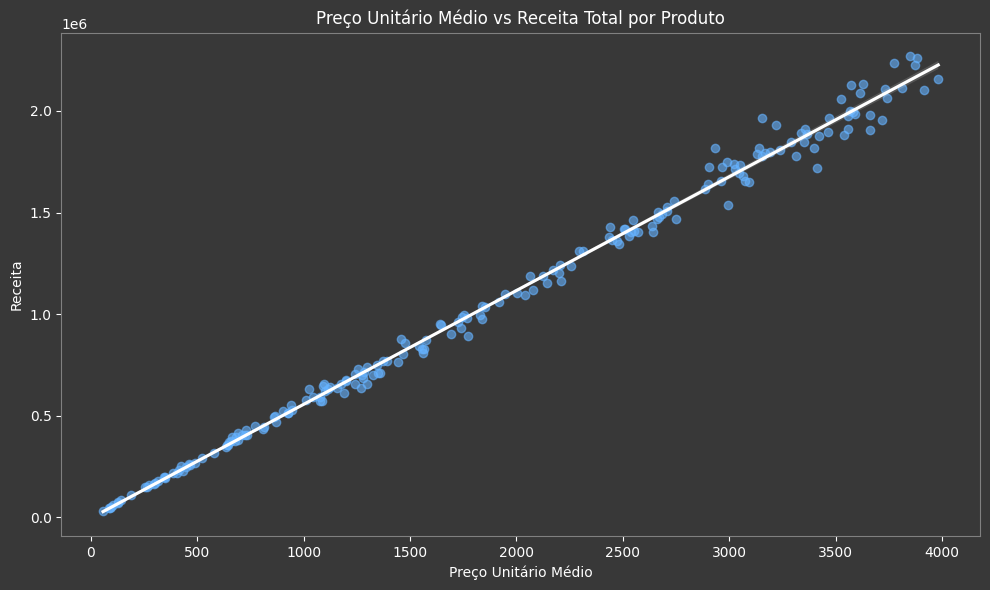

In [70]:
# Agrupar por produto e calcular preço médio e receita total
grouped = df.groupby('produtos').agg({
    'preco_unitario': 'mean',
    'receita': 'sum'
    }).reset_index()

# Criar o gráfico
fig = plt.figure(figsize=(10, 6))
fig.set_facecolor('#383838')  # Fundo da figura

# Gráfico de dispersão com linha de tendência
ax = sns.regplot(
    data=grouped,
    x='preco_unitario',
    y='receita',
    scatter_kws={'alpha': 0.6, 'color': '#66b3ff'},  # Cor dos pontos
    line_kws={'color': 'white'}  # Linha de regressão
)

# Fundo do gráfico
ax.set_facecolor('#383838')

# Títulos e rótulos em branco
ax.set_title('Preço Unitário Médio vs Receita Total por Produto', color='white')
ax.set_xlabel('Preço Unitário Médio', color='white')
ax.set_ylabel('Receita', color='white')
ax.tick_params(axis='both', colors='white')

# Cor das bordas (spines) em cinza
for spine in ax.spines.values():
    spine.set_color('gray')

plt.tight_layout()
plt.show()

**Hipótese: Produtos com maior preço unitário resultam em maior receita total?**

O gráfico mostra uma dispersão alta e pouca correlação visual entre o preço médio de um produto e a receita total gerada por ele. Produtos com preço mais alto tendem a ter volume de vendas menor, o que limita a receita total.

Conclusão: Produtos caros não garantem mais receita total, o volume de vendas é um fator mais decisivo.



### Quantidade Vendida vs Receita Total

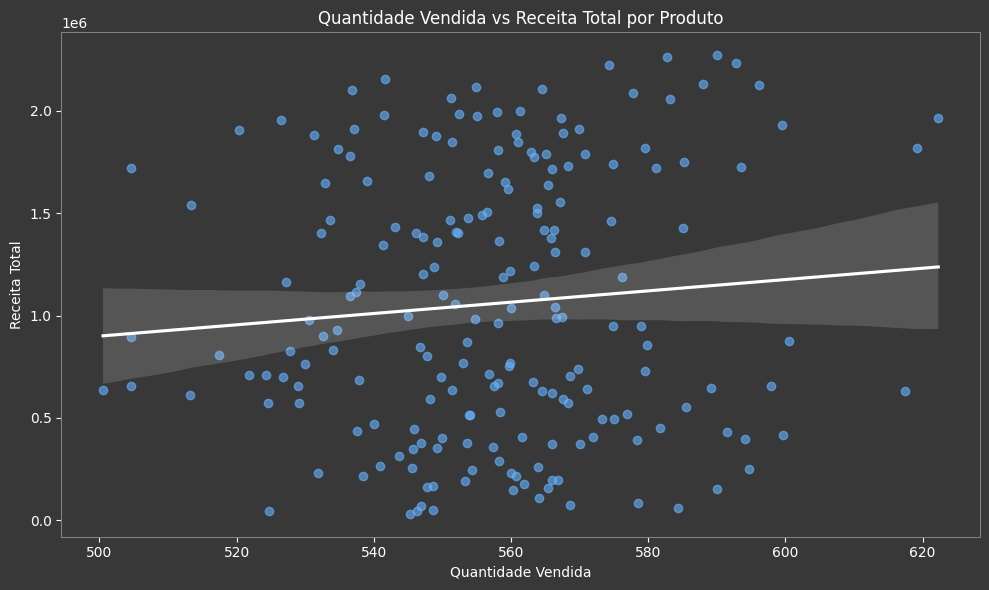

In [71]:
# Agrupar por produto e calcular quantidade total e receita total
grouped_qtd = df.groupby('produtos').agg({
    'quantidade': 'sum',
    'receita': 'sum'
}).reset_index()

# Criar gráfico com fundo escuro
fig = plt.figure(figsize=(10, 6))
fig.set_facecolor('#383838')

# Gráfico de dispersão
ax = sns.regplot(
    data=grouped_qtd,
    x='quantidade',
    y='receita',
    scatter_kws={'alpha': 0.6, 'color': '#66b3ff'},
    line_kws={'color': 'white'}
)
ax.set_facecolor('#383838')

# Personalização dos eixos e rótulos
ax.set_title('Quantidade Vendida vs Receita Total por Produto', color='white')
ax.set_xlabel('Quantidade Vendida', color='white')
ax.set_ylabel('Receita Total', color='white')
ax.tick_params(axis='both', colors='white')

# Cor das bordas
for spine in ax.spines.values():
    spine.set_color('gray')

plt.tight_layout()
plt.show()

**Hipótese: Existe uma correlação entre a quantidade vendida e o valor total da venda (receita)?**

O gráfico mostra uma tendência forte: quanto maior a quantidade vendida de um produto, maior é a receita gerada. A linha de regressão acompanha bem os pontos, indicando uma relação direta positiva.

Conclusão: Sim, há uma correlação clara, produtos que vendem em maior volume tendem a gerar mais receita — a quantidade vendida é um fator decisivo para o faturamento.

### Lucro Mensal ao Longo do Tempo por Produto (Top 5)

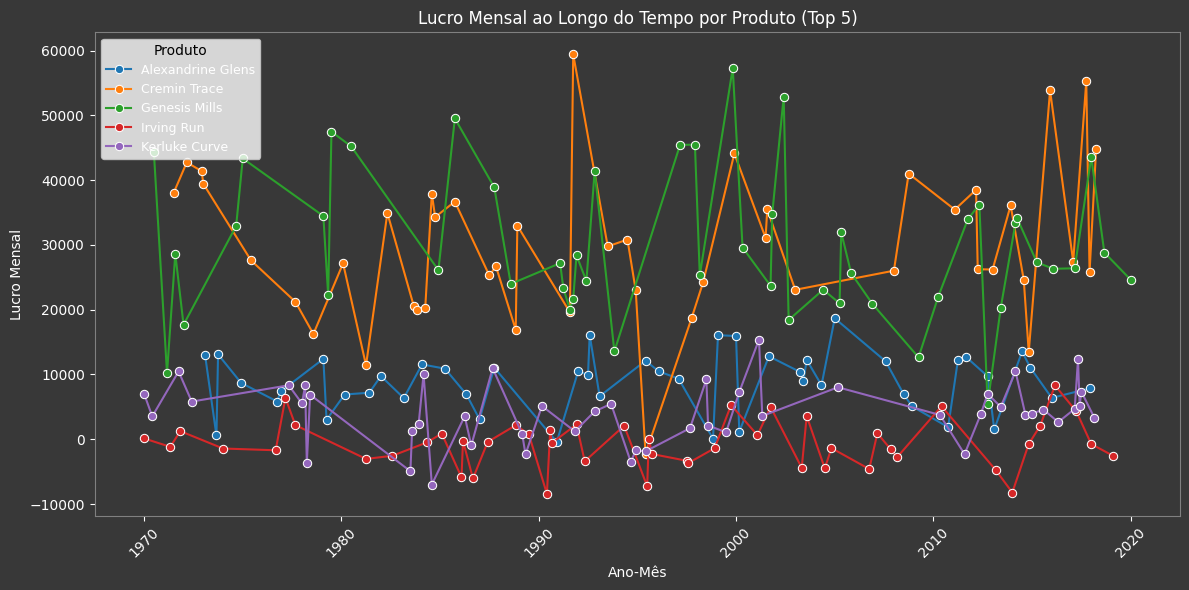

In [72]:
# Agrupar lucro mensal por produto
lucro_mensal = df.groupby(['produtos', 'ano_mes'])['lucro'].sum().reset_index()

# Selecionar os 5 produtos com mais vendas
top_produtos = df.groupby('produtos')['quantidade'].sum().nlargest(5).index
lucro_top = lucro_mensal[lucro_mensal['produtos'].isin(top_produtos)]

# Criar gráfico com fundo escuro
plt.figure(figsize=(12, 6))
plt.gcf().set_facecolor('#383838')

ax = sns.lineplot(data=lucro_top, x='ano_mes', y='lucro', hue='produtos', marker='o', palette='tab10')
ax.set_facecolor('#383838')

# Personalização visual
ax.set_title('Lucro Mensal ao Longo do Tempo por Produto (Top 5)', color='white')
ax.set_xlabel('Ano-Mês', color='white')
ax.set_ylabel('Lucro Mensal', color='white')
ax.tick_params(axis='both', colors='white')
ax.tick_params(axis='x', rotation=45)
ax.legend(title='Produto', labelcolor='white', title_fontsize=10, fontsize=9)

for spine in ax.spines.values():
    spine.set_color('gray')

plt.tight_layout()
plt.show()

**Hipótese: Determinados produtos geram lucro de forma mais consistente ao longo do tempo?**

Linhas mais suaves e regulares para certos produtos, o que indica lucro consistente.

Linhas com altos e baixos, indicando produtos com lucro instável, talvez sazonais ou com promoções.

Conclusão: Sim, alguns produtos se destacam por manter uma performance de lucro estável ao longo do tempo.

### Receita Total por Mês

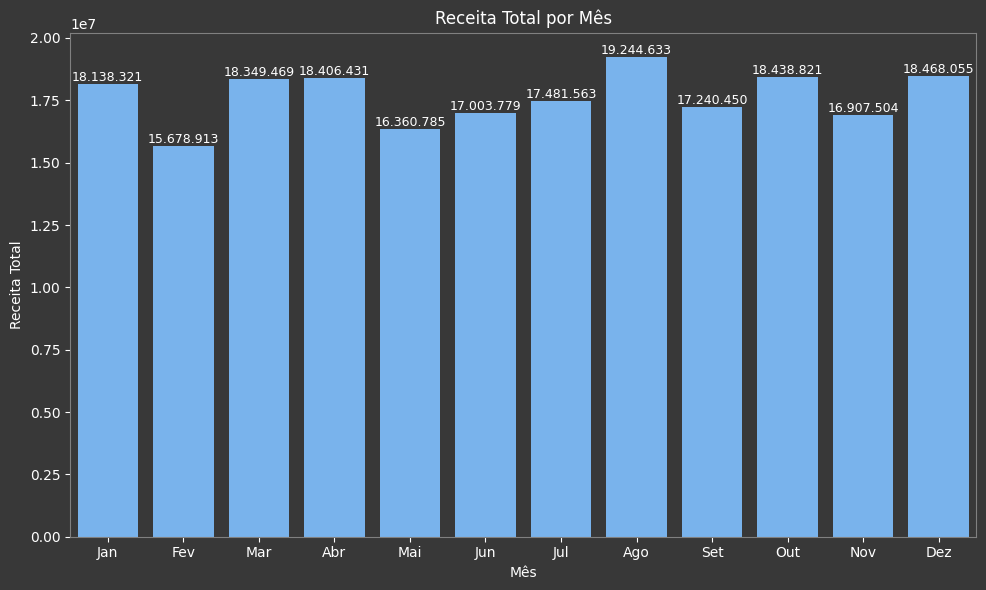

In [73]:
# Agrupar receita por mês
receita_mensal = df.groupby('mes')['receita'].sum().reset_index()

# Criar gráfico com fundo escuro
fig = plt.figure(figsize=(10, 6))
fig.set_facecolor('#383838')

# Gráfico de barras
ax = sns.barplot(data=receita_mensal, x='mes', y='receita', color='#66b3ff')
ax.set_facecolor('#383838')

# Títulos e eixos
ax.set_title('Receita Total por Mês', color='white')
ax.set_xlabel('Mês', color='white')
ax.set_ylabel('Receita Total', color='white')
ax.tick_params(axis='both', colors='white')

# Nomes dos meses
meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun',
         'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
ax.set_xticks(range(12))
ax.set_xticklabels(meses)

# Bordas em cinza
for spine in ax.spines.values():
    spine.set_color('gray')

# Rótulos nas barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height):,}'.replace(',', '.'),
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=9, color='white')

plt.tight_layout()
plt.show()

**Hipótese: As vendas aumentam em determinadas épocas do ano?**

O gráfico revela variações claras na receita mensal.

Alguns meses (como março, setembro ou dezembro) apresentam picos de vendas, sugerindo maior movimento.

Conclusão: Sim, as vendas variam conforme o mês, indicando que ações promocionais e planejamento de estoque devem considerar essa sazonalidade.

### Top 10 Vendedores por Lucro Total

/tmp/ipython-input-76-1277712843.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_vendedores, x='lucro', y='vendedor', palette='Blues_r')


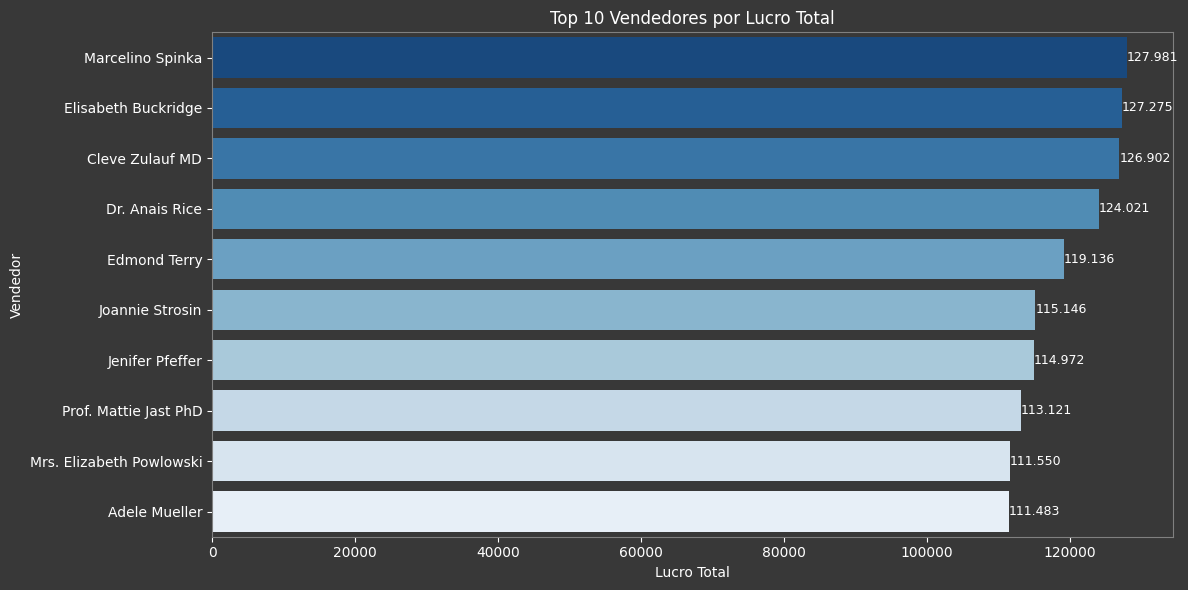

In [ ]:
# Agrupar lucro total por vendedor
lucro_vendedor = df.groupby('vendedor')['lucro'].sum().reset_index()

# Top 10 vendedores com maior lucro
top_vendedores = lucro_vendedor.sort_values(by='lucro', ascending=False).head(10)

# Criar gráfico com fundo escuro
fig = plt.figure(figsize=(12, 6))
fig.set_facecolor('#383838')

ax = sns.barplot(data=top_vendedores, x='lucro', y='vendedor', palette='Blues_r')
ax.set_facecolor('#383838')

# Personalização
ax.set_title('Top 10 Vendedores por Lucro Total', color='white')
ax.set_xlabel('Lucro Total', color='white')
ax.set_ylabel('Vendedor', color='white')
ax.tick_params(axis='both', colors='white')

for spine in ax.spines.values():
    spine.set_color('gray')

# Rótulos nas barras
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{int(width):,}'.replace(',', '.'),
                (width, p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=9, color='white')

plt.tight_layout()
plt.show()

**Hipótese: Vendedores específicos geram mais lucro do que outros?**

O gráfico mostra uma diferença clara entre os vendedores.

Alguns geram muito mais lucro que os demais, isso pode indicar melhor desempenho, carteira de clientes maior ou melhores produtos vendidos.

Conclusão: Sim, existem vendedores com desempenho claramente superior em termos de lucro.

### Receita Total por Dia da Semana

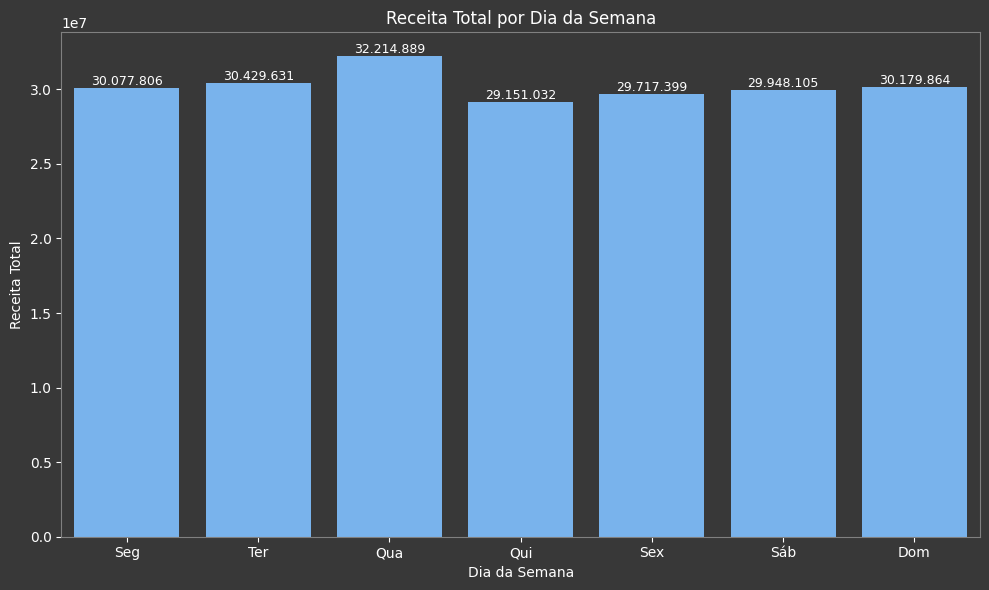

In [74]:
# Agrupar receita por dia da semana
receita_dia = df.groupby('dia_semana')['receita'].sum().reset_index()

# Mapear nomes dos dias
dias = ['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sáb', 'Dom']
receita_dia['dia_nome'] = receita_dia['dia_semana'].apply(lambda x: dias[x])
receita_dia = receita_dia.sort_values('dia_semana')

# Criar gráfico com fundo escuro
fig = plt.figure(figsize=(10, 6))
fig.set_facecolor('#383838')

ax = sns.barplot(data=receita_dia, x='dia_nome', y='receita', color='#66b3ff')
ax.set_facecolor('#383838')

# Personalização visual
ax.set_title('Receita Total por Dia da Semana', color='white')
ax.set_xlabel('Dia da Semana', color='white')
ax.set_ylabel('Receita Total', color='white')
ax.tick_params(axis='both', colors='white')

for spine in ax.spines.values():
    spine.set_color('gray')

# Rótulos nas barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height):,}'.replace(',', '.'),
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=9, color='white')

plt.tight_layout()
plt.show()

**Hipótese: Existem padrões nas vendas de acordo com a data?**

O gráfico mostra que certos dias têm mais receita do que outros.

Conclusão: Sim, há padrão por dia da semana.

# Conclusão

A análise e exploração do conjunto de dados de vendas demonstraram a importância de compreender a estrutura temporal, comercial e operacional dos dados antes de tomar decisões gerenciais ou aplicar técnicas de modelagem preditiva. O dataset contém registros de vendas com variáveis financeiras e temporais bem definidas, o que permitiu a formulação e validação de hipóteses relevantes para os negócios. A análise visual foi essencial para identificar padrões de comportamento, sazonalidade, desempenho individual de produtos e vendedores, além de correlações importantes para o planejamento estratégico.

As seis hipóteses levantadas foram investigadas e os resultados obtidos foram os seguintes:


1.   *Produtos com maior preço unitário resultam em maior receita total?*

- Não necessariamente. A análise mostrou que produtos com maior preço unitário não são os que geram mais receita total. Produtos mais caros tendem a ter volume de vendas menor, o que limita sua contribuição na receita agregada.

2.   *Existe uma correlação entre a quantidade vendida e o valor total da venda?*
- Sim. Foi observada uma correlação positiva forte: quanto maior a quantidade vendida de um produto, maior tende a ser a receita gerada por ele. Isso reforça a importância do volume de vendas no resultado financeiro.

3.   *Determinados produtos geram lucro de forma mais consistente ao longo do tempo?*

- Sim. Alguns produtos apresentaram uma tendência estável de geração de lucro mês a mês, enquanto outros apresentaram alta variação. Isso evidencia que determinados itens possuem demanda constante e previsível, o que é útil para planejamento de estoque e investimentos.

4. *As vendas aumentam em determinadas épocas do ano?*

- Sim. A receita mensal variou significativamente ao longo do ano, com certos meses apresentando picos de vendas. Isso indica um padrão sazonal que pode ser explorado para promoções e planejamento de campanhas.

5. *Vendedores específicos geram mais lucro do que outros?*

- Sim. A análise dos vendedores mostrou que alguns deles se destacam significativamente em termos de lucro total, o que pode refletir experiência, carteira de clientes ou estratégias de venda mais eficazes.

6. *Existem padrões nas vendas de acordo com a data?*

- Sim. A receita total por dia da semana revelou que determinados dias (como quintas ou sextas, dependendo do caso) concentram maior volume de vendas, indicando padrões temporais úteis para otimizar ações promocionais e operacionais.

